In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/system-threat-forecaster/train.csv
/kaggle/input/system-threat-forecaster/test.csv
/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


## Data Import

In [2]:
df=pd.read_csv("/kaggle/input/system-threat-forecaster/train.csv")
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [3]:
df_test=pd.read_csv("/kaggle/input/system-threat-forecaster/test.csv")
df_test.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,...,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,...,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
2,692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,...,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
3,2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,...,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
4,256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,...,12126.0,0,0.0,0,0,0.0,0.0,7.0,2018-05-06 01:31:00,2018-06-12


## Milestone 2 questions

### 1. Identify the redundant columns in the training dataset based on the values taken.


In [4]:
'''X['IsFlightsDisabled'].value_counts()'''

"X['IsFlightsDisabled'].value_counts()"

In [5]:
'''df['AutoSampleSubmissionEnabled'].value_counts()'''

"df['AutoSampleSubmissionEnabled'].value_counts()"

### 2. Determine the columns among the given set which have the highest positive correlation.

In [6]:
'''from sklearn.preprocessing import OrdinalEncoder
selected_features = [ 'OSBuildLab', 'NumericOSVersion', 
                    'OSEdition', 'OSSkuFriendlyName', 'OSProductSuite']
df[selected_features].head()


categorical_cols = ['OSBuildLab','NumericOSVersion', 'OSEdition', 'OSSkuFriendlyName', 'OSProductSuite']
encoder = OrdinalEncoder()
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])
correlation_matrix = df[selected_features].corr(method='pearson') 
correlation_pairs = [
    ("OSBuildLab", "NumericOSVersion"),
    ("OSEdition", "OSSkuFriendlyName"),
    ("OSProductSuite", "OSSkuFriendlyName")
]

for col1, col2 in correlation_pairs:
   correlation_value = correlation_matrix.loc[col1, col2]
   print(f"Correlation between {col1} and {col2}: {correlation_value:.4f}")'''

'from sklearn.preprocessing import OrdinalEncoder\nselected_features = [ \'OSBuildLab\', \'NumericOSVersion\', \n                    \'OSEdition\', \'OSSkuFriendlyName\', \'OSProductSuite\']\ndf[selected_features].head()\n\n\ncategorical_cols = [\'OSBuildLab\',\'NumericOSVersion\', \'OSEdition\', \'OSSkuFriendlyName\', \'OSProductSuite\']\nencoder = OrdinalEncoder()\ndf[categorical_cols] = encoder.fit_transform(df[categorical_cols])\ncorrelation_matrix = df[selected_features].corr(method=\'pearson\') \ncorrelation_pairs = [\n    ("OSBuildLab", "NumericOSVersion"),\n    ("OSEdition", "OSSkuFriendlyName"),\n    ("OSProductSuite", "OSSkuFriendlyName")\n]\n\nfor col1, col2 in correlation_pairs:\n   correlation_value = correlation_matrix.loc[col1, col2]\n   print(f"Correlation between {col1} and {col2}: {correlation_value:.4f}")'

### 3. Create a new dataframe called cat_df which contains only the columns of datatype  'object'. In cat_df, for all the columns which take less than or equal to 10 unique values, use OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'). What is the new number of columns in the cat_df dataframe?

In [7]:
'''from sklearn.preprocessing import OneHotEncoder

cat_df = X.select_dtypes(include=['object']).copy()
low_cardinality_cols = [col for col in cat_df.columns if cat_df[col].nunique() <= 10]
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
encoded_array = encoder.fit_transform(cat_df[low_cardinality_cols])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(low_cardinality_cols))
cat_df.drop(columns=low_cardinality_cols, inplace=True)
print(cat_df.shape)
cat_df = pd.concat([cat_df, encoded_df], axis=1)
print("New number of columns in cat_df:", cat_df.shape[1])'''

'from sklearn.preprocessing import OneHotEncoder\n\ncat_df = X.select_dtypes(include=[\'object\']).copy()\nlow_cardinality_cols = [col for col in cat_df.columns if cat_df[col].nunique() <= 10]\nencoder = OneHotEncoder(sparse=False, drop=\'first\', handle_unknown=\'ignore\')\nencoded_array = encoder.fit_transform(cat_df[low_cardinality_cols])\n\nencoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(low_cardinality_cols))\ncat_df.drop(columns=low_cardinality_cols, inplace=True)\nprint(cat_df.shape)\ncat_df = pd.concat([cat_df, encoded_df], axis=1)\nprint("New number of columns in cat_df:", cat_df.shape[1])'

### Create a new dataframe called num_df which contains only the columns of datatype  'int64' and 'float64'. Use MinMaxScaler() on num_df. What is the sum of all the values in num_df?

In [8]:
'''from sklearn.preprocessing import MinMaxScaler

num_df = df.select_dtypes(include=['int64', 'float64']).copy()
scaler = MinMaxScaler()
num_df_scaled = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
sum_of_values = num_df_scaled.sum().sum()

print("Sum of all values in num_df:", sum_of_values)'''

'from sklearn.preprocessing import MinMaxScaler\n\nnum_df = df.select_dtypes(include=[\'int64\', \'float64\']).copy()\nscaler = MinMaxScaler()\nnum_df_scaled = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)\nsum_of_values = num_df_scaled.sum().sum()\n\nprint("Sum of all values in num_df:", sum_of_values)'

### 4.

In [9]:
'''from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

cat_cols = X_imputed.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_imputed[cat_cols] = encoder.fit_transform(X_imputed[cat_cols])

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score on Test Data:", accuracy)
'''

'from sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import OrdinalEncoder\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import SGDClassifier\nfrom sklearn.metrics import accuracy_score\n\nimputer = SimpleImputer(strategy=\'most_frequent\')\nX_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)\n\ncat_cols = X_imputed.select_dtypes(include=[\'object\']).columns\nencoder = OrdinalEncoder(handle_unknown=\'use_encoded_value\', unknown_value=-1)\n\nX_imputed[cat_cols] = encoder.fit_transform(X_imputed[cat_cols])\n\nX_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)\nmodel = SGDClassifier(random_state=42)\nmodel.fit(X_train, y_train)\ny_pred = model.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\n\nprint("Accuracy Score on Test Data:", accuracy)\n'

## Milestone 3 

In [10]:
'''import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_cols = X.select_dtypes(include=['number']).columns
categoric_cols = X.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = num_imputer.fit_transform(X[numeric_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
X[categoric_cols] = cat_imputer.fit_transform(X[categoric_cols])

label_encoders = {}
for col in categoric_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)'''

"import pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import LabelEncoder, StandardScaler\nfrom sklearn.impute import SimpleImputer\n\nnumeric_cols = X.select_dtypes(include=['number']).columns\ncategoric_cols = X.select_dtypes(include=['object']).columns\n\nnum_imputer = SimpleImputer(strategy='mean')\nX[numeric_cols] = num_imputer.fit_transform(X[numeric_cols])\n\ncat_imputer = SimpleImputer(strategy='most_frequent')\nX[categoric_cols] = cat_imputer.fit_transform(X[categoric_cols])\n\nlabel_encoders = {}\nfor col in categoric_cols:\n    le = LabelEncoder()\n    X[col] = le.fit_transform(X[col])\n    label_encoders[col] = le  \n\nscaler = StandardScaler()\nX[numeric_cols] = scaler.fit_transform(X[numeric_cols])\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)"

In [11]:
#1
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_model=DecisionTreeClassifier(random_state=42)

param_grid={'max_depth': [20, 30],
'min_samples_split': [2, 5],
'min_samples_leaf': [1, 2]}

grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=3, scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train,y_train)

best_params=grid_search.best_params_
best_score=grid_search.best_score_

print(best_params)
print(best_score)'''

"from sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import GridSearchCV\n\ndt_model=DecisionTreeClassifier(random_state=42)\n\nparam_grid={'max_depth': [20, 30],\n'min_samples_split': [2, 5],\n'min_samples_leaf': [1, 2]}\n\ngrid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=3, scoring='accuracy',n_jobs=-1)\n\ngrid_search.fit(X_train,y_train)\n\nbest_params=grid_search.best_params_\nbest_score=grid_search.best_score_\n\nprint(best_params)\nprint(best_score)"

In [12]:
'''from sklearn.metrics import accuracy_score
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)
np.round(accuracy_score(y_test,y_pred),2)'''

'from sklearn.metrics import accuracy_score\nbest_model = grid_search.best_estimator_\ny_pred=best_model.predict(X_test)\nnp.round(accuracy_score(y_test,y_pred),2)'

In [13]:
#2
'''from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [5, 10],
    'algorithm': ['SAMME']
}

grid_search_ada = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, 
                               cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search_ada.fit(X_train, y_train)

best_params_ada = grid_search_ada.best_params_
best_score_ada = grid_search_ada.best_score_
best_params_ada'''

"from sklearn.ensemble import AdaBoostClassifier\n\nadaboost_model = AdaBoostClassifier(random_state=42)\n\nparam_grid = {\n    'n_estimators': [10, 20, 30],\n    'learning_rate': [5, 10],\n    'algorithm': ['SAMME']\n}\n\ngrid_search_ada = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, \n                               cv=3, scoring='accuracy', n_jobs=-1, verbose=1)\n\ngrid_search_ada.fit(X_train, y_train)\n\nbest_params_ada = grid_search_ada.best_params_\nbest_score_ada = grid_search_ada.best_score_\nbest_params_ada"

In [14]:
'''best_model_ada=grid_search_ada.best_estimator_
np.round(accuracy_score(y_test, best_model_ada.predict(X_test)),2)'''

'best_model_ada=grid_search_ada.best_estimator_\nnp.round(accuracy_score(y_test, best_model_ada.predict(X_test)),2)'

## Milestone 4 questions

In [15]:
'''df = df.dropna()'''

'df = df.dropna()'

In [16]:
'''X=df.drop(columns=['target'])
y=df['target']'''

"X=df.drop(columns=['target'])\ny=df['target']"

In [17]:
'''from sklearn.preprocessing import OrdinalEncoder, StandardScaler
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
encoder = OrdinalEncoder()
X[categorical_columns] = encoder.fit_transform(X[categorical_columns])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)'''

"from sklearn.preprocessing import OrdinalEncoder, StandardScaler\ncategorical_columns = X.select_dtypes(include=['object', 'category']).columns\nencoder = OrdinalEncoder()\nX[categorical_columns] = encoder.fit_transform(X[categorical_columns])\n\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)"

In [18]:
'''#1 
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

n_components_70 = np.argmax(cumulative_variance >= 0.70) + 1

print(f"Number of components needed to explain 70% variance: {n_components_70}")'''

'#1 \nfrom sklearn.decomposition import PCA\npca = PCA()\nX_pca = pca.fit_transform(X_scaled)\n\ncumulative_variance = np.cumsum(pca.explained_variance_ratio_)\n\nn_components_70 = np.argmax(cumulative_variance >= 0.70) + 1\n\nprint(f"Number of components needed to explain 70% variance: {n_components_70}")'

In [19]:
'''#2 
from sklearn.metrics import mean_squared_error

pca = PCA(n_components=n_components_70)
X_pca = pca.fit_transform(X_scaled)

X_reconstructed = pca.inverse_transform(X_pca)

mse = mean_squared_error(X_scaled, X_reconstructed)

print(f"Mean Squared Error after reconstruction: {mse}")'''

'#2 \nfrom sklearn.metrics import mean_squared_error\n\npca = PCA(n_components=n_components_70)\nX_pca = pca.fit_transform(X_scaled)\n\nX_reconstructed = pca.inverse_transform(X_pca)\n\nmse = mean_squared_error(X_scaled, X_reconstructed)\n\nprint(f"Mean Squared Error after reconstruction: {mse}")'

In [20]:
'''#3
pca = PCA()
pca.fit(X_scaled)
explained_variance_40 = np.sum(pca.explained_variance_ratio_[:40])
print(f"Variance explained by the first 40 components: {explained_variance_40:.4f}")'''

'#3\npca = PCA()\npca.fit(X_scaled)\nexplained_variance_40 = np.sum(pca.explained_variance_ratio_[:40])\nprint(f"Variance explained by the first 40 components: {explained_variance_40:.4f}")'

In [21]:
'''X_scaled.shape'''

'X_scaled.shape'

In [22]:
'''X.shape'''

'X.shape'

In [23]:
'''#4
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Select top 15 features using f_classif
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X_scaled_df, y)

# Get names of selected features
selected_features = X_scaled_df.columns[selector.get_support()]

print("Top 15 selected features:", selected_features.tolist())'''

'#4\nfrom sklearn.feature_selection import VarianceThreshold\nfrom sklearn.feature_selection import SelectKBest, f_classif\n\nX_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)\n\n# Select top 15 features using f_classif\nselector = SelectKBest(score_func=f_classif, k=15)\nX_new = selector.fit_transform(X_scaled_df, y)\n\n# Get names of selected features\nselected_features = X_scaled_df.columns[selector.get_support()]\n\nprint("Top 15 selected features:", selected_features.tolist())'

In [24]:
'''f_scores = selector.scores_
best_score = max(f_scores)

print(f"Score of the best feature: {best_score:.4f}")'''

'f_scores = selector.scores_\nbest_score = max(f_scores)\n\nprint(f"Score of the best feature: {best_score:.4f}")'

## Milestone 5

In [25]:
'''import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer'''

'import pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import OrdinalEncoder, StandardScaler\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.compose import ColumnTransformer'

In [26]:
'''def preprocess_data(df, target_column):
    
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numeric_cols = X.select_dtypes(include=[np.number]).columns

    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder())
    ])

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer([
        ('cat', cat_pipeline, categorical_cols),
        ('num', num_pipeline, numeric_cols)
    ])

    X_processed = preprocessor.fit_transform(X)

    processed_columns = list(categorical_cols) + list(numeric_cols)
    X_processed = pd.DataFrame(X_processed, columns=processed_columns)

    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_data(df,'target')
'''

"def preprocess_data(df, target_column):\n    \n    X = df.drop(columns=[target_column])\n    y = df[target_column]\n    \n    categorical_cols = X.select_dtypes(include=['object', 'category']).columns\n    numeric_cols = X.select_dtypes(include=[np.number]).columns\n\n    cat_pipeline = Pipeline([\n        ('imputer', SimpleImputer(strategy='most_frequent')),\n        ('encoder', OrdinalEncoder())\n    ])\n\n    num_pipeline = Pipeline([\n        ('imputer', SimpleImputer(strategy='mean')),\n        ('scaler', StandardScaler())\n    ])\n\n    preprocessor = ColumnTransformer([\n        ('cat', cat_pipeline, categorical_cols),\n        ('num', num_pipeline, numeric_cols)\n    ])\n\n    X_processed = preprocessor.fit_transform(X)\n\n    processed_columns = list(categorical_cols) + list(numeric_cols)\n    X_processed = pd.DataFrame(X_processed, columns=processed_columns)\n\n    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)\n\n    retu

In [27]:
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_decision_tree(X_train, X_test, y_train, y_test):
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}\n')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

    return dt_model
train_decision_tree(X_train, X_test, y_train, y_test)'''

"from sklearn.tree import DecisionTreeClassifier\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\n\ndef train_decision_tree(X_train, X_test, y_train, y_test):\n    dt_model = DecisionTreeClassifier(random_state=42)\n    dt_model.fit(X_train, y_train)\n\n    y_pred = dt_model.predict(X_test)\n\n    accuracy = accuracy_score(y_test, y_pred)\n    print(f'Accuracy: {accuracy:.2f}\n')\n    print('Classification Report:\n', classification_report(y_test, y_pred))\n    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))\n\n    return dt_model\ntrain_decision_tree(X_train, X_test, y_train, y_test)"

In [28]:
'''5605+5237
'''

'5605+5237\n'

In [29]:
'''from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_adaboost(X_train, X_test, y_train, y_test):
    
    ada_model = AdaBoostClassifier(n_estimators=10, learning_rate=10, random_state=42)
    ada_model.fit(X_train, y_train)

    y_pred = ada_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}\n')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

    return ada_model
    
ada_model = train_adaboost(X_train, X_test, y_train, y_test)
'''

"from sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\n\ndef train_adaboost(X_train, X_test, y_train, y_test):\n    \n    ada_model = AdaBoostClassifier(n_estimators=10, learning_rate=10, random_state=42)\n    ada_model.fit(X_train, y_train)\n\n    y_pred = ada_model.predict(X_test)\n\n    accuracy = accuracy_score(y_test, y_pred)\n    print(f'Accuracy: {accuracy:.2f}\n')\n    print('Classification Report:\n', classification_report(y_test, y_pred))\n    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))\n\n    return ada_model\n    \nada_model = train_adaboost(X_train, X_test, y_train, y_test)\n"

In [30]:
'''from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_logistic_regression(X_train, X_test, y_train, y_test):
    
    log_reg = LogisticRegression(random_state=42)
    log_reg.fit(X_train, y_train)

    y_pred = log_reg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}\n')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

    return log_reg

log_reg = train_logistic_regression(X_train, X_test, y_train, y_test)
'''

"from sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\n\ndef train_logistic_regression(X_train, X_test, y_train, y_test):\n    \n    log_reg = LogisticRegression(random_state=42)\n    log_reg.fit(X_train, y_train)\n\n    y_pred = log_reg.predict(X_test)\n\n    accuracy = accuracy_score(y_test, y_pred)\n    print(f'Accuracy: {accuracy:.2f}\n')\n    print('Classification Report:\n', classification_report(y_test, y_pred))\n    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))\n\n    return log_reg\n\nlog_reg = train_logistic_regression(X_train, X_test, y_train, y_test)\n"

In [31]:
'''2856+7849'''


'2856+7849'

## Data exploration and manipulation

In [32]:
df.shape


(100000, 76)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [34]:
df.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [35]:
pd.set_option('display.max_rows', None)

In [36]:
df.isnull().sum()

MachineID                               0
ProductName                             0
EngineVersion                           0
AppVersion                              0
SignatureVersion                        0
IsBetaUser                              0
RealTimeProtectionState                66
IsPassiveModeEnabled                    0
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
HasTpm                                  0
CountryID                               0
CityID                                623
GeoRegionID                             0
LocaleEnglishNameID                     0
PlatformType                            0
Processor                               0
OSVersion                               0
OSBuildNumber                           0
OSProductSuite                          0
OsPlatformSubRelease                    0
OSBuildLab                              0
SKUEditionName                    

**Grouping all features into 7 categories- Out of which security settings and antivirus related features seem the most important**

In [37]:
# System Specifications Features
system_specifications = [
    'ProcessorCoreCount',
    'TotalPhysicalRAMMB',
    'PrimaryDiskCapacityMB',
    'PrimaryDiskType',
    'SystemVolumeCapacityMB',
    'HasOpticalDiskDrive',
    'InternalBatteryNumberOfCharges',
    'ProcessorManufacturerID',
    'ProcessorModelID',
    'OEMNameID',
    'OEMModelID',
    'DeviceFamily',
    'PowerPlatformRole',
    'PrimaryDisplayDiagonalInches',
    'PrimaryDisplayResolutionHorizontal',
    'PrimaryDisplayResolutionVertical'
]

# Operating System Info Features
operating_system_info = [
    'OSVersion',
    'OSBuildNumber',
    'OSEdition',
    'OSArchitecture',
    'OSBranch',
    'OSBuildLab',
    'OSProductSuite',
    'NumericOSVersion',
    'SKUEditionName',
    'OSSkuFriendlyName',
    'OSInstallType',
    'OSInstallLanguageID',
    'OSUILocaleID',
    'OSBuildNumberOnly',
    'OSBuildRevisionOnly',
    'OsPlatformSubRelease'
]

# Security Settings Features
security_settings = [
    'FirewallEnabled',
    'IsSystemProtected',
    'RealTimeProtectionState',
    'AutoSampleSubmissionEnabled',
    'IsBetaUser',
    'IsPassiveModeEnabled',
    'AntivirusConfigID',
    'NumAntivirusProductsInstalled',
    'NumAntivirusProductsEnabled',
    'EnableLUA',
    'IsSecureBootEnabled',
    'IsAlwaysOnAlwaysConnectedCapable',
    'IsPortableOS',
    'OSGenuineState',
    'IsFlightsDisabled',
    'SMode',
    'IsPenCapable',
    'IsGamer'
]

# Hardware Characteristics Features
hardware_characteristics = [
    'HasTpm',
    'ChassisType',
    'IsTouchEnabled',
    'IsVirtualDevice',
    'Processor',
    'FirmwareManufacturerID',
    'FirmwareVersionID'
]

# Geographic/Location Features
geographic_location = [
    'CountryID',
    'CityID',
    'GeoRegionID',
    'RegionIdentifier',
    'LocaleEnglishNameID'
]

# Antivirus Related Features
antivirus_related = [
    'ProductName',
    'EngineVersion',
    'AppVersion',
    'SignatureVersion',
    'LicenseActivationChannel',
    'FlightRing'
]

# Date Columns
date_columns = [
    'DateAS',
    'DateOS'
]


### **List of all numerical features**

In [38]:

numerical_features = df.select_dtypes(include=['number']).columns

numerical_features_list = numerical_features.tolist()

missing_numerical_features = [feature for feature in numerical_features_list if df[feature].isnull().any()]

print(len(missing_numerical_features))

30


In [39]:
len(numerical_features_list)

48

### **List of all categorical features**

In [40]:

categorical_features = df.select_dtypes(include=['object', 'category']).columns

categorical_features_list = categorical_features.tolist()

missing_categorical_features = [feature for feature in categorical_features_list if df[feature].isnull().any()]

print(missing_categorical_features)

['PrimaryDiskType', 'ChassisType', 'DateOS']


> There are only 3 categorical features with missing values

In [41]:
len(categorical_features_list)

28

### **Exploring 'PrimaryDiskType' column**

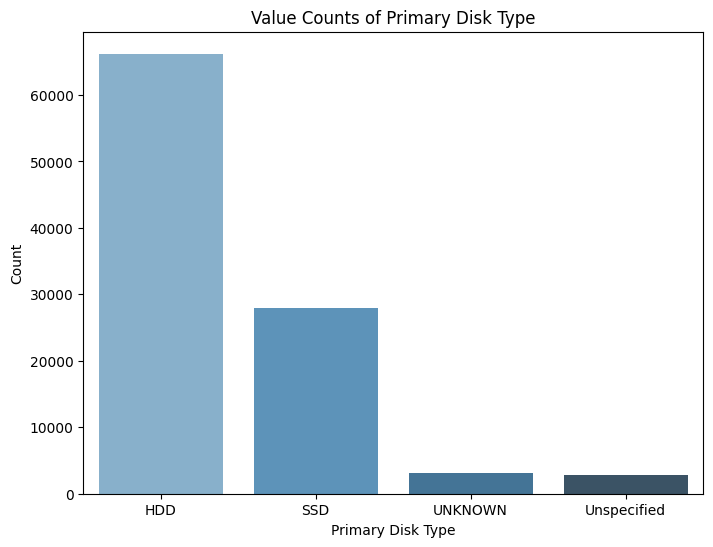

In [42]:
value_counts=df['PrimaryDiskType'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='Blues_d')
plt.xlabel('Primary Disk Type')
plt.ylabel('Count')
plt.title('Value Counts of Primary Disk Type')

plt.show()

In [43]:
value_counts
((3105+2775)/100000)*100

5.88

> Around 6% values are unknown or unspecified

### **Exploring 'ChassisType' column**

In [44]:
df['ChassisType'].value_counts()

ChassisType
Notebook               59459
Desktop                20818
Laptop                  7811
Portable                4126
AllinOne                2269
Convertible              966
MiniTower                952
Detachable               611
LowProfileDesktop        559
Other                    535
HandHeld                 526
UNKNOWN                  454
SpaceSaving              324
Tablet                   163
Tower                    129
MainServerChassis        111
Unknown                   59
LunchBox                  39
MiniPC                    34
RackMountChassis          17
BusExpansionChassis       13
SubNotebook               11
0                          4
30                         4
CompactPCI                 1
SubChassis                 1
MultisystemChassis         1
35                         1
Name: count, dtype: int64


> unknown values=454+59= 513Values that dont make sense= 9


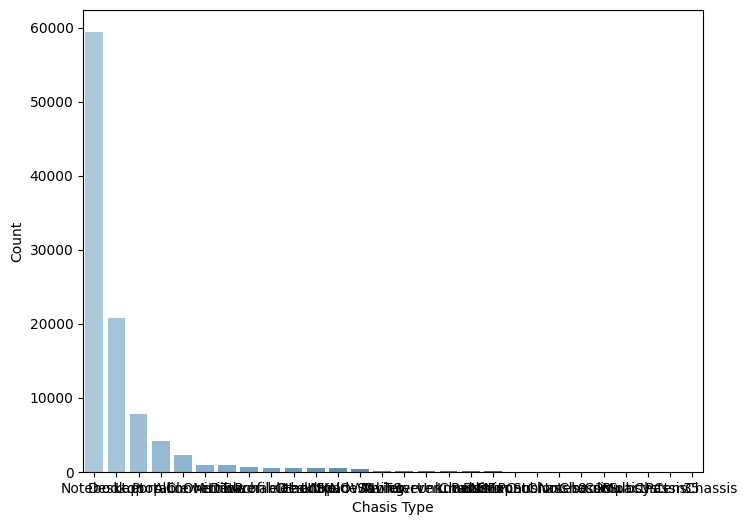

In [45]:
value_counts=df['ChassisType'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='Blues_d')
plt.xlabel('Chasis Type')
plt.ylabel('Count')
plt.show()

### **Exploring 'DateOS' column**

In [46]:
df['DateOS'].value_counts()

DateOS
2018-08-14    20905
2018-07-10    16719
2018-05-08     8156
2018-04-10     6946
2018-06-12     6442
2018-09-11     5997
2017-10-10     3688
2017-12-12     3222
2018-07-24     2968
2017-06-13     2825
2018-03-13     2224
2018-01-03     1783
2018-02-13     1359
2018-07-16     1283
2018-09-17     1271
2018-08-30     1252
2018-06-26      945
2018-04-20      920
2017-11-14      710
2017-01-10      661
2017-09-12      645
2017-08-08      638
2018-05-23      620
2017-03-30      593
2017-07-11      522
2018-04-17      427
2017-05-09      366
2016-11-08      342
2017-04-11      312
2016-07-20      291
2016-03-08      270
2015-07-15      265
2017-03-14      253
2016-08-09      191
2018-05-21      186
2016-12-13      183
2017-04-25      175
2016-10-27      165
2016-07-12      163
2017-11-30      158
2016-10-11      149
2018-09-20      142
2018-03-05      141
2016-04-12      139
2016-05-10      135
2016-02-09      130
2018-06-21      130
2016-06-14      122
2018-01-31      115
2017-05-25   

> Years- 2015, 16, 17, 18

In [47]:
missing_columns = df.columns[df.isnull().any()].tolist()

missing_counts = df[missing_columns].isnull().sum()

print(missing_counts)

RealTimeProtectionState                66
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
CityID                                623
IsSystemProtected                      76
SMode                                 981
IEVersionID                           107
FirewallEnabled                       166
EnableLUA                              19
OEMNameID                             212
OEMModelID                            228
ProcessorCoreCount                     85
ProcessorManufacturerID                85
ProcessorModelID                       85
PrimaryDiskCapacityMB                 110
PrimaryDiskType                        23
SystemVolumeCapacityMB                110
TotalPhysicalRAMMB                    151
ChassisType                             2
PrimaryDisplayDiagonalInches           72
PrimaryDisplayResolutionHorizontal     72
PrimaryDisplayResolutionVertical       72
InternalBatteryNumberOfCharges    

>  The 'SMode' column has highest number of missing values. Inspecting the missing values

In [48]:
df['SMode'].value_counts()

SMode
0.0    98969
1.0       50
Name: count, dtype: int64

### **Exploring the target column**

In [49]:
df['target'].value_counts()

target
1    50525
0    49475
Name: count, dtype: int64

> **Hence, the data is NOT imbalanced**

### **Percentage of rows missing in data**

In [50]:
total_rows = df.shape[0]

rows_with_missing = df.isnull().any(axis=1).sum()

percentage_missing = (rows_with_missing / total_rows) * 100

print(f"Percentage of rows with missing data: {percentage_missing:.2f}%")

Percentage of rows with missing data: 3.31%


In [51]:
df1=df
df1.shape

(100000, 76)

In [52]:
#Test
df1_test=df_test
df1_test.shape

(10000, 75)

In [53]:
df1.isnull().sum().sum()

6533

***Note- df1 stores the train data after dropping missing values***

> **Correlation Matrix to identify highly correlated numerical features**

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


[]

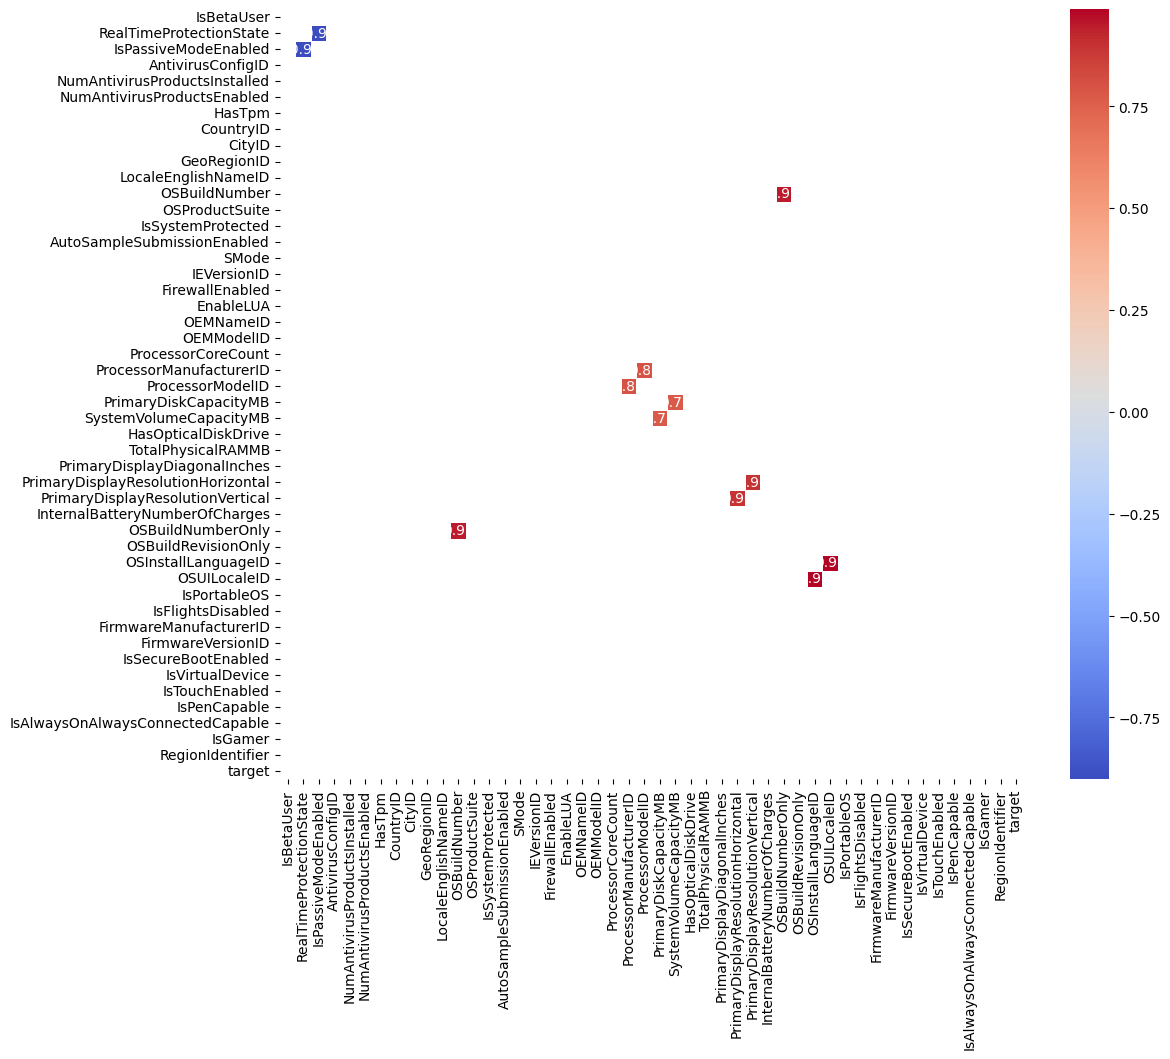

In [54]:

numerical_data = df1[numerical_features_list]

correlation_matrix = numerical_data.corr()


strong_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

mask = strong_corr.isnull() | (strong_corr == 1.0)

plt.figure(figsize=(12, 10))  
sns.heatmap(
    strong_corr,
    mask=mask,         
    annot=True,             
    fmt=".2f",               
    cmap="coolwarm",         
    cbar=True,             
    linewidths=0.5,          
)
plt.plot()

In [55]:
strong_corr_pairs = strong_corr.unstack().reset_index()

strong_corr_pairs = strong_corr_pairs[(strong_corr_pairs[0] > 0.6) | (strong_corr_pairs[0] < -0.6)]

strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['level_0'] != strong_corr_pairs['level_1']]

strong_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
strong_corr_pairs

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


,Feature 1,Feature 2,Correlation
50,RealTimeProtectionState,IsPassiveModeEnabled,-0.901426
97,IsPassiveModeEnabled,RealTimeProtectionState,-0.901426
560,OSBuildNumber,OSBuildNumberOnly,0.947564
1079,ProcessorManufacturerID,ProcessorModelID,0.801885
1126,ProcessorModelID,ProcessorManufacturerID,0.801885
1177,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,0.771121
1224,SystemVolumeCapacityMB,PrimaryDiskCapacityMB,0.771121
1422,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,0.898174
1469,PrimaryDisplayResolutionVertical,PrimaryDisplayResolutionHorizontal,0.898174
1547,OSBuildNumberOnly,OSBuildNumber,0.947564


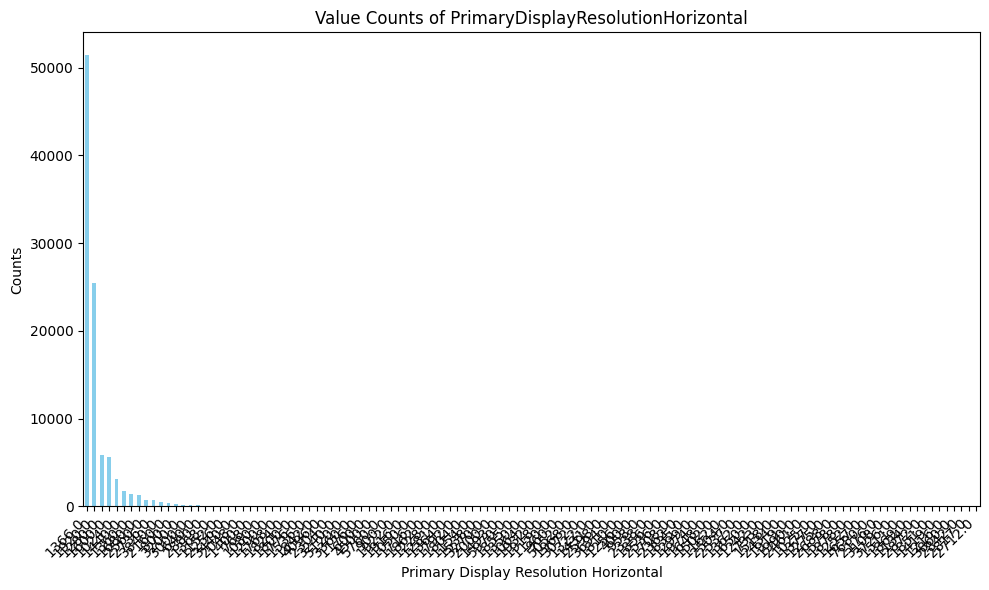

In [56]:
value_counts = df['PrimaryDisplayResolutionHorizontal'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of PrimaryDisplayResolutionHorizontal')
plt.xlabel('Primary Display Resolution Horizontal')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

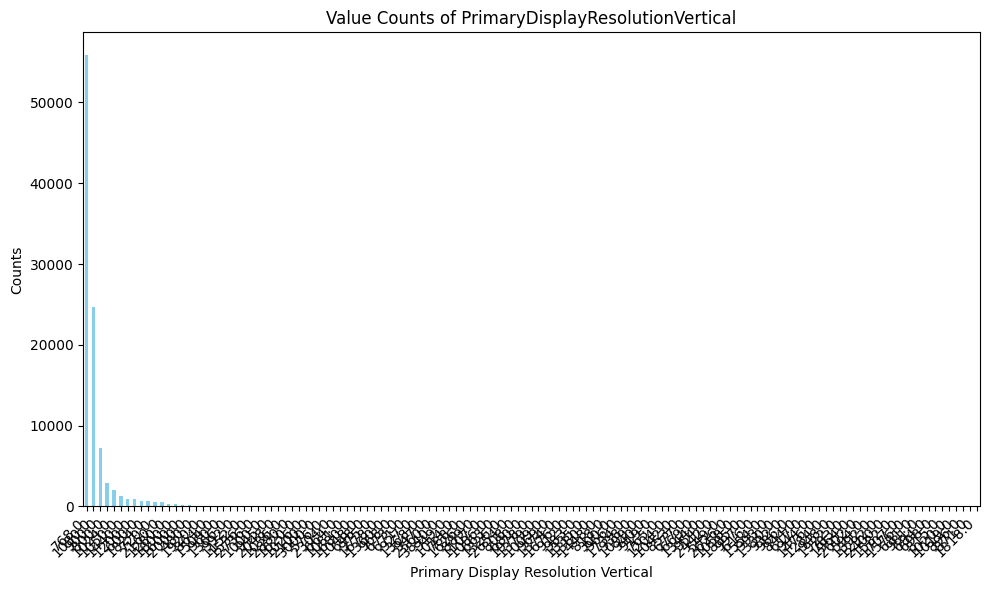

In [57]:
value_counts = df['PrimaryDisplayResolutionVertical'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of PrimaryDisplayResolutionVertical')
plt.xlabel('Primary Display Resolution Vertical')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 ### **1. Deciding between OSBuildNumber and OSBuildNumberOnly**

In [58]:
print(df['OSBuildNumber'].value_counts())
print(df['OSBuildNumberOnly'].value_counts())

OSBuildNumber
17134    45837
16299    29632
15063     8376
14393     7378
10586     3869
10240     3108
9600      1401
7601       226
17744       26
17692       26
17738       20
17758       14
17735       14
17741       14
17746       14
17713       11
17755        7
17763        6
17751        6
17760        5
17672        4
17754        3
17730        2
17686        1
Name: count, dtype: int64
OSBuildNumberOnly
17134    46908
16299    28939
15063     8526
14393     7780
10586     4544
10240     3125
17738       27
17744       27
17692       26
17746       17
17735       14
17741       13
17758       13
17760        8
17763        7
17755        7
17754        6
17751        5
17672        4
17723        1
15060        1
17133        1
17686        1
Name: count, dtype: int64


**Using variance Inflation factor**

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['OSBuildNumber', 'OSBuildNumberOnly']]  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

             feature         VIF
0      OSBuildNumber  664.076551
1  OSBuildNumberOnly  664.076551


> Both have the same VIF, so now I will evaluate feature importances

In [60]:
from sklearn.model_selection import train_test_split
X = df[['OSBuildNumber', 'OSBuildNumberOnly']]  
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

importances = model.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

OSBuildNumber: 0.48578706735623917
OSBuildNumberOnly: 0.5142129326437608


> keeping OSBuildNumberOnly and dropping OSBuildNumber 

In [61]:
df2=df1.drop(columns=['OSBuildNumber'])
#test
df2_test=df1_test.drop(columns=['OSBuildNumber'])

**Combining all the less frequent categories in OSBuildNumberOnly as 'Others'**

### **2. Deciding between RealTimeProtectionState ans IsPassiveModeEnabled**

In [62]:
df2['RealTimeProtectionState'].value_counts()
mode_value = df2['RealTimeProtectionState'].mode()[0]

# Impute missing values with the mode
df2['RealTimeProtectionState'].fillna(mode_value, inplace=True)
print(df2['RealTimeProtectionState'].isnull().sum()) 

0


<ipython-input-62-2202e7411e2b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['RealTimeProtectionState'].fillna(mode_value, inplace=True)


In [63]:
from sklearn.model_selection import train_test_split
X = df2[['RealTimeProtectionState', 'IsPassiveModeEnabled']]  
y = df2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

importances = model.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

RealTimeProtectionState: 0.7373610138258492
IsPassiveModeEnabled: 0.2626389861741508


> removing IsPassiveModeEnabled and keeping RealTimeProtectionState

In [64]:
df2=df2.drop(columns=['IsPassiveModeEnabled'])
#test
df2_test=df2_test.drop(columns=['IsPassiveModeEnabled'])

**Reason for high correlation - When passive mode is enabled, the real time protection state doesnt work**


### **3. Deciding between OSInstallLanguageID	and OSUILocaleID**

> Removing OSInstallLanguageID because of large number of missing values 

In [65]:
df2=df2.drop(columns=['OSInstallLanguageID'])
#test
df2_test=df2_test.drop(columns=['OSInstallLanguageID'])

In [66]:
df2['OSUILocaleID'].value_counts()

OSUILocaleID
31     35768
34     11623
30      5916
125     5499
49      4942
158     4321
35      4193
119     3781
26      2736
148     2348
160     2251
72      2178
83      1861
109     1576
115     1476
120     1244
64       963
74       903
5        893
20       810
28       620
140      570
58       489
24       453
105      343
128      341
11       232
130      222
44       210
62       197
151      167
123      145
48       138
145      122
90        86
156       86
136       52
68        50
38        49
159       43
92        37
17        25
12         5
54         4
32         3
15         3
7          3
37         2
6          2
126        2
131        2
29         2
87         2
162        1
75         1
146        1
8          1
36         1
121        1
42         1
161        1
59         1
46         1
99         1
Name: count, dtype: int64

### **4. Deciding between PrimaryDisplayResolutionHorizontal and PrimaryDisplayResolutionVertical**

In [67]:
df2['PrimaryDisplayResolutionHorizontal'].value_counts()
mode_value = df2['PrimaryDisplayResolutionHorizontal'].mode()[0]

# Impute missing values with the mode
df2['PrimaryDisplayResolutionHorizontal'].fillna(mode_value, inplace=True)
print(df2['PrimaryDisplayResolutionHorizontal'].isnull().sum()) 

0


<ipython-input-67-23239d44bfcf>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['PrimaryDisplayResolutionHorizontal'].fillna(mode_value, inplace=True)


In [68]:
df2['PrimaryDisplayResolutionVertical'].value_counts()
mode_value = df2['PrimaryDisplayResolutionVertical'].mode()[0]

df2['PrimaryDisplayResolutionVertical'].fillna(mode_value, inplace=True)
print(df2['PrimaryDisplayResolutionVertical'].isnull().sum()) 

0


<ipython-input-68-ba9191057ffb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['PrimaryDisplayResolutionVertical'].fillna(mode_value, inplace=True)


In [69]:
from sklearn.model_selection import train_test_split
X = df2[['PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical']]  
y = df2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

importances = model.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance}')

PrimaryDisplayResolutionHorizontal: 0.536511879376323
PrimaryDisplayResolutionVertical: 0.46348812062367706


> removing PrimaryDisplayResolutionVertical and keeping PrimaryDisplayResolutionHorizontal

In [70]:
df2=df2.drop(columns=['PrimaryDisplayResolutionVertical'])
#test
df2_test=df2_test.drop(columns=['PrimaryDisplayResolutionVertical'])

### **Converting DateOS to year and dropping DateAS**

In [71]:
df2['DateOS'] = pd.to_datetime(df2['DateOS']).dt.year

In [72]:
#test
df2_test['DateOS'] = pd.to_datetime(df2_test['DateOS']).dt.year

In [73]:
df2=df2.drop(columns=['DateAS'])
#test
df2_test=df2_test.drop(columns=['DateAS'])

***Note- df2 stores df1 after removing highly correlated columns***

In [74]:
df2['AutoUpdateOptionsName'].value_counts()

AutoUpdateOptionsName
FullAuto                                 45154
UNKNOWN                                  26299
Notify                                   23746
AutoInstallAndRebootAtMaintenanceTime     4444
Off                                        328
DownloadNotify                              29
Name: count, dtype: int64

### **Dropping 'AutoUpdateOptionsName' column because of too many unknown values**

### **Replacing all the rows with 'PrimaryDiskType' column having UNKNOWN or Unspecified values with mode(HDD).**

In [75]:
mode_value = df2['PrimaryDiskType'].mode()[0] 
df2['PrimaryDiskType'] = df2['PrimaryDiskType'].replace(['UNKNOWN', 'Unspecified'], mode_value)

In [76]:
mode_value = df2_test['PrimaryDiskType'].mode()[0] 
df2_test['PrimaryDiskType'] = df2_test['PrimaryDiskType'].replace(['UNKNOWN', 'Unspecified'], mode_value)

### **Dropping 'OSVersion' since necessary information can be obtained by 'PlatformType' column only.**

In [77]:
df2['PlatformType'].value_counts()

PlatformType
windows10      98344
windows8        1401
windows7         226
windows2016       29
Name: count, dtype: int64

In [78]:
df2 = df2.drop(columns=['AutoUpdateOptionsName','OSVersion'])

In [79]:
df2_test = df2_test.drop(columns=['AutoUpdateOptionsName','OSVersion'])


In [80]:
df2_test.shape

(10000, 68)

In [81]:
df2.shape

(100000, 69)

### **Grouping the 'ChassisType' column**

In [82]:
top_categories = ['Notebook', 'Desktop', 'Laptop', 'Portable']

df2['ChassisType'] = df2['ChassisType'].apply(lambda x: x if x in top_categories else 'others')
df2['ChassisType'].value_counts()

ChassisType
Notebook    59459
Desktop     20818
Laptop       7811
others       7786
Portable     4126
Name: count, dtype: int64

In [83]:
df2_test['ChassisType'] = df2_test['ChassisType'].apply(lambda x: x if x in top_categories else 'others')
df2_test['ChassisType'].value_counts()

ChassisType
Notebook    5967
Desktop     2044
others       799
Laptop       778
Portable     412
Name: count, dtype: int64

### **Extracting Age of system as 'DateAS'-'DateOS'**

In [84]:
'''df2['DateAS'] = pd.to_datetime(df2_['DateAS'])
df2['DateOS'] = pd.to_datetime(df2_['DateOS'])

df2['SystemAgeInDays'] = (df2['DateAS'] - df2['DateOS']).dt.days
df2['SystemAgeInDays'].head()'''

"df2['DateAS'] = pd.to_datetime(df2_['DateAS'])\ndf2['DateOS'] = pd.to_datetime(df2_['DateOS'])\n\ndf2['SystemAgeInDays'] = (df2['DateAS'] - df2['DateOS']).dt.days\ndf2['SystemAgeInDays'].head()"

In [85]:
'''#test
df2_test['DateAS'] = pd.to_datetime(df2_test['DateAS'])
df2_test['DateOS'] = pd.to_datetime(df2_test['DateOS'])

df2_test['SystemAgeInDays'] = (df2_test['DateAS'] - df2_test['DateOS']).dt.days
df2_test['SystemAgeInDays'].head()'''


"#test\ndf2_test['DateAS'] = pd.to_datetime(df2_test['DateAS'])\ndf2_test['DateOS'] = pd.to_datetime(df2_test['DateOS'])\n\ndf2_test['SystemAgeInDays'] = (df2_test['DateAS'] - df2_test['DateOS']).dt.days\ndf2_test['SystemAgeInDays'].head()"

In [86]:
df2.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,53447.0,1.0,1.0,...,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018.0,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,53447.0,1.0,1.0,...,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018.0,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,53447.0,1.0,1.0,...,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018.0,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,46413.0,2.0,1.0,...,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018.0,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,40466.0,2.0,1.0,...,13224.0,0,0.0,0,0,0.0,1.0,7.0,2018.0,0


In [87]:
df2.describe()

,IsBetaUser,RealTimeProtectionState,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateOS,target
count,100000.0,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,100000.000000,...,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,99976.000000,100000.000000
mean,0.0,6.848530,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,122.695100,...,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,2017.773436,0.505250
std,0.0,1.014838,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,69.242252,...,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.518149,0.499975
min,0.0,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,...,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2015.000000,0.000000
25%,0.0,7.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,74.000000,...,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2018.000000,0.000000
50%,0.0,7.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,88.000000,...,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2018.000000,1.000000
75%,0.0,7.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,182.000000,...,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2018.000000,1.000000
max,0.0,8.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,283.000000,...,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,2018.000000,1.000000


In [88]:
df['ProcessorCoreCount'].value_counts() # will impute with median 

ProcessorCoreCount
4.0     62036
2.0     25310
8.0      9824
12.0     1040
6.0       790
1.0       530
16.0      202
3.0       106
32.0       21
20.0       19
24.0       15
28.0        7
40.0        4
36.0        4
10.0        2
48.0        2
64.0        1
5.0         1
56.0        1
Name: count, dtype: int64


> Features with outliers-'ProcessorCoreCount','TotalPhysicalRAMMB,Features to check for values making no sense-'EnableLUA'


In [89]:
df2['EnableLUA'].isnull().sum()

19

### **Creating a box plot for suspicious features**

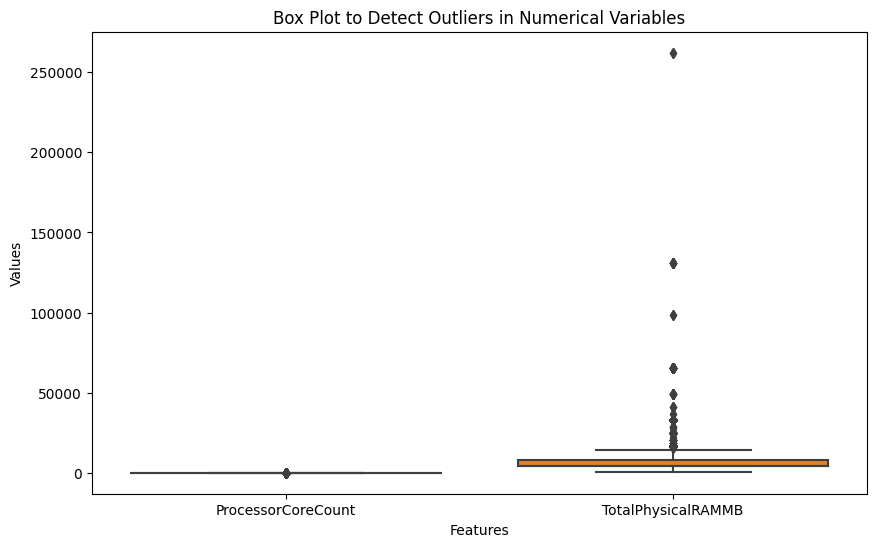

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2[['ProcessorCoreCount','TotalPhysicalRAMMB']])

plt.title('Box Plot to Detect Outliers in Numerical Variables')
plt.xlabel('Features')
plt.ylabel('Values')

plt.show()

**Dropping outliers**

In [91]:
'''Q1 = df2[['ProcessorCoreCount', 'TotalPhysicalRAMMB']].quantile(0.25)
Q3 = df2[['ProcessorCoreCount', 'TotalPhysicalRAMMB']].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = df2[~((df2[['ProcessorCoreCount', 'TotalPhysicalRAMMB']] < lower_bound) |
                     (df2[['ProcessorCoreCount', 'TotalPhysicalRAMMB']] > upper_bound)).any(axis=1)]
df2.shape
'''

"Q1 = df2[['ProcessorCoreCount', 'TotalPhysicalRAMMB']].quantile(0.25)\nQ3 = df2[['ProcessorCoreCount', 'TotalPhysicalRAMMB']].quantile(0.75)\n\nIQR = Q3 - Q1\n\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\ndf2 = df2[~((df2[['ProcessorCoreCount', 'TotalPhysicalRAMMB']] < lower_bound) |\n                     (df2[['ProcessorCoreCount', 'TotalPhysicalRAMMB']] > upper_bound)).any(axis=1)]\ndf2.shape\n"

In [92]:
#test
# not doing it for test set

In [93]:
df2['EnableLUA'].value_counts()

EnableLUA
1.0     99494
0.0       484
48.0        3
Name: count, dtype: int64

In [94]:
df2.shape

(100000, 69)

> 'TotalPhysicalRAMMB' column has many outliers but they correspond to high performing machines.

**Checking for binary imbalanced features**

In [95]:
binary_features = [col for col in df2.columns if df2[col].nunique() == 2]
binary_features

['ProductName',
 'HasTpm',
 'IsSystemProtected',
 'SMode',
 'FirewallEnabled',
 'DeviceFamily',
 'PrimaryDiskType',
 'HasOpticalDiskDrive',
 'IsPortableOS',
 'IsSecureBootEnabled',
 'IsVirtualDevice',
 'IsTouchEnabled',
 'IsPenCapable',
 'IsAlwaysOnAlwaysConnectedCapable',
 'IsGamer',
 'target']

## **Removing binary features with more than 99% imbalance**

In [96]:
'''for feature in binary_features:
    value_counts = df2[feature].value_counts(normalize=True) * 100
    
    if value_counts.max() > 99:
        print(f"Feature '{feature}' has a category with more than 99% of values:")
        print(value_counts)
        print()
        df2 = df2.drop(columns=[feature])
        df2_test = df2_test.drop(columns=[feature])'''

'for feature in binary_features:\n    value_counts = df2[feature].value_counts(normalize=True) * 100\n    \n    if value_counts.max() > 99:\n        print(f"Feature \'{feature}\' has a category with more than 99% of values:")\n        print(value_counts)\n        print()\n        df2 = df2.drop(columns=[feature])\n        df2_test = df2_test.drop(columns=[feature])'

### **Checking relation between AppVersion and target using Chi-square test of independence**

In [97]:
df3=df2.copy()
df3_test=df2_test.copy()

In [98]:
import scipy.stats as stats
contingency_table = pd.crosstab(df3['AppVersion'], df3['target'])

chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

print('Chi-square test p-value:', p_val)

Chi-square test p-value: 6.951062569677955e-255


In [99]:
appversion_counts = df3['AppVersion'].value_counts()

infrequent_versions = appversion_counts[appversion_counts < 3000].index

df3['AppVersion'] = df3['AppVersion'].apply(lambda x: 'Other' if x in infrequent_versions else x)

In [100]:
#Test
df3_test['AppVersion'] = df3_test['AppVersion'].apply(lambda x: 'Other' if x in infrequent_versions else x)

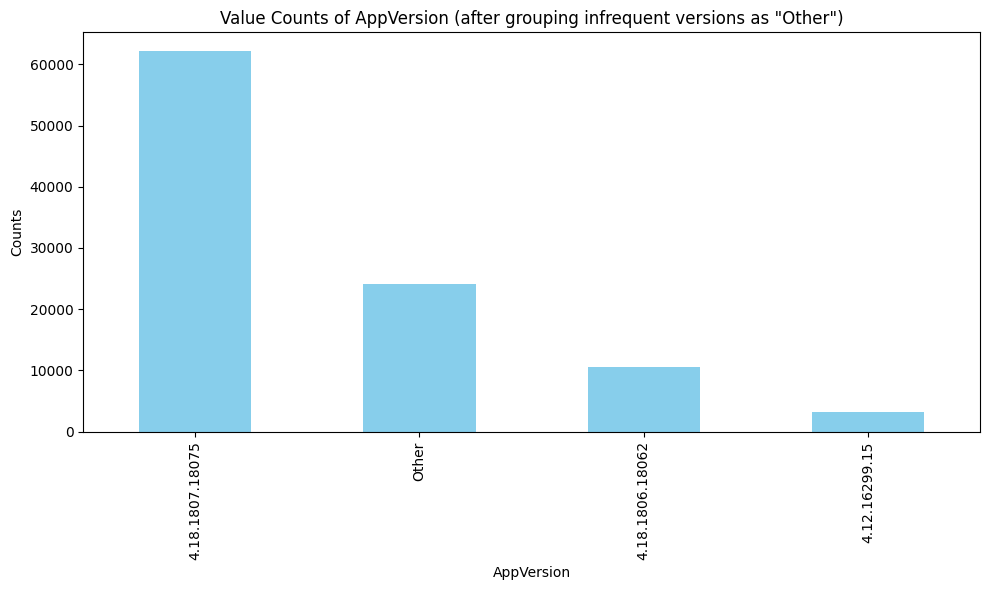

In [101]:
appversion_counts_after = df3['AppVersion'].value_counts()

plt.figure(figsize=(10, 6))
appversion_counts_after.plot(kind='bar', color='skyblue')
plt.title('Value Counts of AppVersion (after grouping infrequent versions as "Other")')
plt.xlabel('AppVersion')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **Similar test for SignatureVersion and EngineVersion**

In [102]:
contingency_table = pd.crosstab(df3['SignatureVersion'], df3['target'])

chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

print('Chi-square test p-value:', p_val)

Chi-square test p-value: 4.4376978654221545e-122


In [103]:
contingency_table = pd.crosstab(df3['EngineVersion'], df3['target'])

chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

print('Chi-square test p-value:', p_val)

Chi-square test p-value: 0.0


> SignatureVersion and AppVersion are very significant features for target whereas EngineVersion not so much

In [104]:
engineversion_counts = df3['EngineVersion'].value_counts()

infrequent_versions = engineversion_counts[engineversion_counts < 10000].index

df3['EngineVersion'] = df3['EngineVersion'].apply(lambda x: 'Other' if x in infrequent_versions else x)

In [105]:
engineversion_counts

EngineVersion
1.1.15200.1    45219
1.1.15100.1    44017
1.1.15000.2     3169
1.1.14901.4     2597
1.1.14800.3     1719
1.1.15300.6      650
1.1.14700.5      593
1.1.14600.4      569
1.1.14104.0      328
1.1.15300.5      255
1.1.13504.0      212
1.1.14500.5      124
1.1.14405.2       82
1.1.14306.0       56
1.1.14202.0       50
1.1.14003.0       34
1.1.13804.0       33
1.1.13903.0       28
1.1.13303.0       27
1.1.13601.0       26
1.1.13407.0       23
1.1.15000.1       22
1.1.14901.3       22
1.1.13103.0       20
1.1.14305.0       17
1.1.14700.4       16
1.1.12902.0       15
1.1.13704.0       15
1.1.13701.0       15
1.1.13202.0       14
1.1.13000.0       10
1.1.14700.3        9
1.1.14800.1        7
1.1.14500.2        3
1.1.12805.0        2
1.1.13802.0        1
1.1.13803.0        1
Name: count, dtype: int64

In [106]:
#test
df3_test['EngineVersion'] = df3_test['EngineVersion'].apply(lambda x: 'Other' if x in infrequent_versions else x)


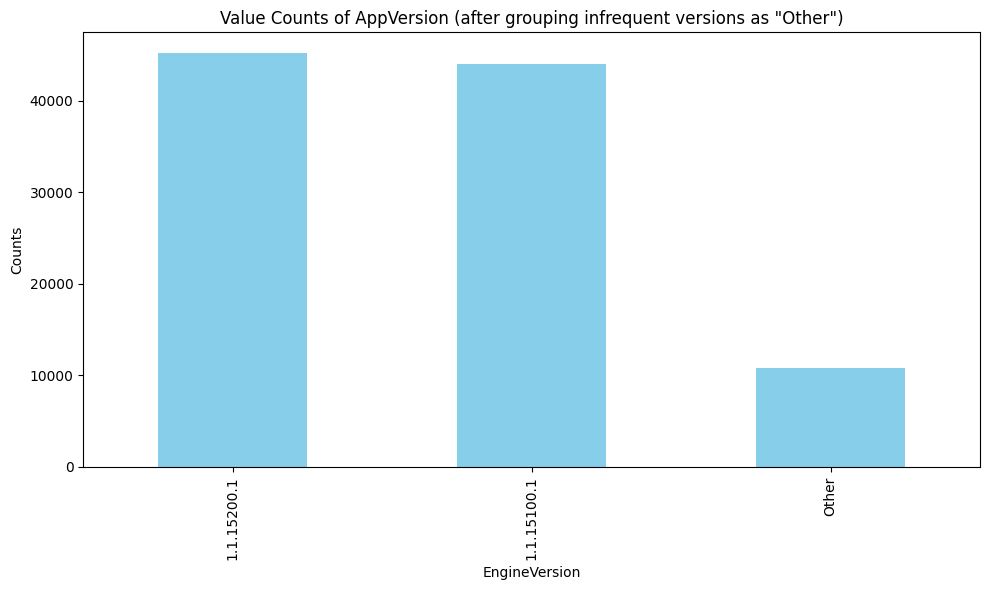

In [107]:
engineversion_counts_after = df3['EngineVersion'].value_counts()

plt.figure(figsize=(10, 6))
engineversion_counts_after.plot(kind='bar', color='skyblue')
plt.title('Value Counts of AppVersion (after grouping infrequent versions as "Other")')
plt.xlabel('EngineVersion')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

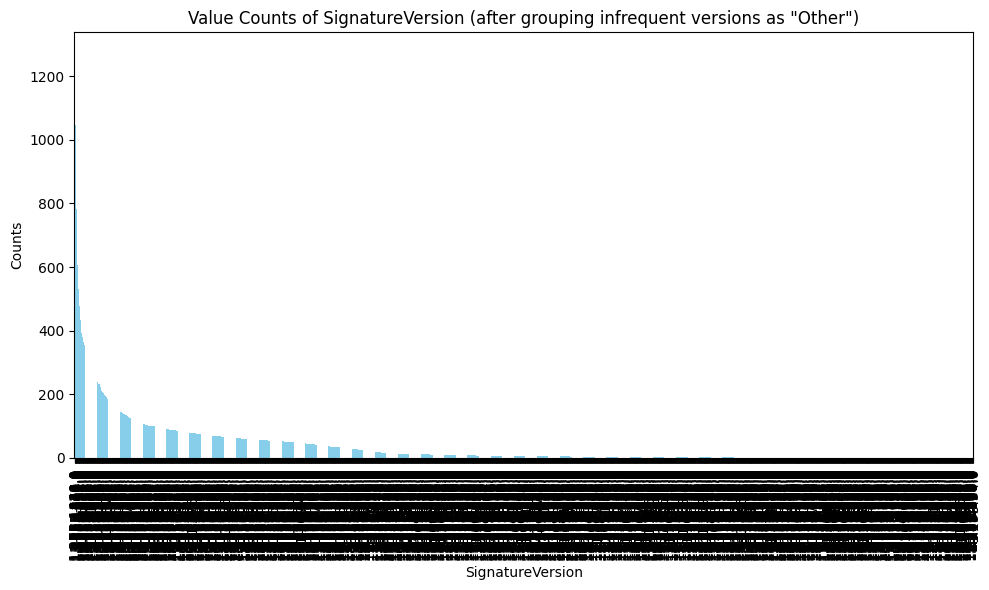

In [108]:
signatureversion_counts_after = df3['SignatureVersion'].value_counts()

plt.figure(figsize=(10, 6))
signatureversion_counts_after.plot(kind='bar', color='skyblue')
plt.title('Value Counts of SignatureVersion (after grouping infrequent versions as "Other")')
plt.xlabel('SignatureVersion')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> SignatureVerison has a strict exponential distribution

### **Exploring each categorical column**

In [109]:
df3.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,53447.0,1.0,1.0,...,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018.0,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,53447.0,1.0,1.0,...,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018.0,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,53447.0,1.0,1.0,...,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018.0,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,Other,1.275.1141.0,0,7.0,46413.0,2.0,1.0,...,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018.0,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,Other,1.275.1283.0,0,7.0,40466.0,2.0,1.0,...,13224.0,0,0.0,0,0,0.0,1.0,7.0,2018.0,0



> Converting SignatureVersion into numeric features by breaking it down
> 1.275.1003.0- Major version, minor update, build, patch number
> Making 2 new columns as build and patch number


In [110]:
df[['NumericOSVersion','PlatformType','SignatureVersion']].tail()

,NumericOSVersion,PlatformType,SignatureVersion
99995,10.0.17134.319,windows10,1.275.1582.0
99996,10.0.17134.165,windows10,1.273.1156.0
99997,10.0.16299.309,windows10,1.275.209.0
99998,10.0.17134.48,windows10,1.269.641.0
99999,10.0.17134.228,windows10,1.271.1003.0


In [111]:
df3[['MajorVersion', 'MinorVersion', 'Build', 'PatchNumber']] = df3['SignatureVersion'].str.split('.', expand=True)
df3['MinorVersion']=df3['MinorVersion'].astype(int)
df3['Build']=df3['Build'].astype(int)
df4=df3.drop(columns=['SignatureVersion', 'MajorVersion','PatchNumber'])

In [112]:
df4['Build'].dtypes

dtype('int64')

In [113]:
#Test
df3_test[['MajorVersion', 'MinorVersion', 'Build', 'PatchNumber']] = df3_test['SignatureVersion'].str.split('.', expand=True)
df3_test['MinorVersion']=df3_test['MinorVersion'].astype(int)
df3_test['Build']=df3_test['Build'].astype(int)
df4_test=df3_test.drop(columns=['SignatureVersion', 'MajorVersion','PatchNumber'])

### **Inspecting the geographical features**

In [114]:
import pandas as pd
from scipy.stats import chi2_contingency

def perform_chi_square_test(df, target_column, feature_column):
    contingency_table = pd.crosstab(df[target_column], df[feature_column])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return chi2, p_value, dof

chi2_city, p_value_city, dof_city = perform_chi_square_test(df4, 'target', 'CityID')
chi2_country, p_value_country, dof_country = perform_chi_square_test(df4, 'target', 'CountryID')
chi2_georegion, p_value_georegion, dof_georegion = perform_chi_square_test(df4, 'target', 'GeoRegionID')

print(f"Chi-square test for Target vs CityID: chi2 = {chi2_city}, p-value = {p_value_city}, dof = {dof_city}")
print(f"Chi-square test for Target vs CountryID: chi2 = {chi2_country}, p-value = {p_value_country}, dof = {dof_country}")
print(f"Chi-square test for Target vs GeoRegionID: chi2 = {chi2_georegion}, p-value = {p_value_georegion}, dof = {dof_georegion}")


Chi-square test for Target vs CityID: chi2 = 16747.406754553733, p-value = 5.59032146830369e-05, dof = 16046
Chi-square test for Target vs CountryID: chi2 = 757.7483458475742, p-value = 1.6956006515637618e-60, dof = 219
Chi-square test for Target vs GeoRegionID: chi2 = 604.3967063350394, p-value = 9.424290478264091e-34, dof = 238


### **Discarding CityID because of large number of dof**

In [115]:
df5=df4.drop(columns=['CityID','FirmwareVersionID'])

In [116]:
#test
df5_test=df4_test.drop(columns=['CityID','FirmwareVersionID'])

### **Extracting Revision from NumericOSVersion feature and then dropping it**

In [117]:
df5.head()

,MachineID,ProductName,EngineVersion,AppVersion,IsBetaUser,RealTimeProtectionState,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,...,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateOS,target,MinorVersion,Build
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,0,7.0,53447.0,1.0,1.0,1,...,0.0,1,0,1.0,0.0,6.0,2018.0,0,275,1003
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,53447.0,1.0,1.0,1,...,0.0,0,0,0.0,0.0,10.0,2018.0,1,273,1465
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,0,7.0,53447.0,1.0,1.0,1,...,0.0,0,0,0.0,1.0,6.0,2018.0,1,275,1546
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,Other,0,7.0,46413.0,2.0,1.0,1,...,0.0,0,0,0.0,0.0,12.0,2018.0,1,275,1141
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,Other,0,7.0,40466.0,2.0,1.0,1,...,0.0,0,0,0.0,1.0,7.0,2018.0,0,275,1283


In [118]:
df5['NumericOSVersion'].head()

0    10.0.14393.2214
1     10.0.17134.228
2     10.0.17134.285
3     10.0.15063.850
4     10.0.17134.285
Name: NumericOSVersion, dtype: object

In [119]:
df5_test['NumericOSVersion'].head()

0    10.0.17134.165
1    10.0.14393.321
2    10.0.16299.431
3    10.0.16299.431
4    10.0.17134.112
Name: NumericOSVersion, dtype: object

In [120]:
df5['Revision'] = df5['NumericOSVersion'].str.split('.', expand=True)[3].astype(int)

df5 = df5.drop(columns=['NumericOSVersion'])

### **Finally, dropping 'OSBuildLab' because all the necessary information can be obtained via other features**

In [121]:
#test
df5_test['Revision'] = df5_test['NumericOSVersion'].str.split('.', expand=True)[3].astype(int)
df5_test = df5_test.drop(columns=['NumericOSVersion'])

In [122]:
df6=df5.drop(columns=['OSBuildLab'])
df6.shape

(100000, 67)

In [123]:
df6_test=df5_test.drop(columns=['OSBuildLab'])
df6_test.shape

(10000, 66)

### **Grouping PowerPlatformRole Categories**

In [124]:
df6['PowerPlatformRole'] = df6['PowerPlatformRole'].apply(lambda x: x if x in ['Mobile', 'Desktop', 'Slate'] else 'Other')


In [125]:
df6_test['PowerPlatformRole'] = df6_test['PowerPlatformRole'].apply(lambda x: x if x in ['Mobile', 'Desktop', 'Slate'] else 'Other')


In [126]:
df6['OSSkuFriendlyName'].value_counts()

OSSkuFriendlyName
CORE                            39273
PROFESSIONAL                    35313
CORE_SINGLELANGUAGE             22004
CORE_COUNTRYSPECIFIC             1820
EDUCATION                         495
ENTERPRISE                        392
PROFESSIONAL_N                    294
ENTERPRISE_S                      238
CLOUD                              66
CORE_N                             48
STANDARD_SERVER                    21
ENTERPRISE_S_N                     13
EDUCATION_N                        11
STANDARD_EVALUATION_SERVER          5
ENTERPRISE_N                        2
SB_SOLUTION_SERVER                  2
PRO_WORKSTATION                     2
DATACENTER_EVALUATION_SERVER        1
Name: count, dtype: int64

In [127]:
df['OSEdition'].value_counts()

OSEdition
Core                       39275
Professional               34602
CoreSingleLanguage         22006
CoreCountrySpecific         1823
ProfessionalEducation        704
Education                    495
Enterprise                   391
ProfessionalN                289
EnterpriseS                  238
Cloud                         67
CoreN                         49
ServerStandard                21
EnterpriseSN                  13
EducationN                    11
ServerStandardEval             5
ProfessionalEducationN         3
EnterpriseN                    3
ServerSolution                 2
ProfessionalWorkstation        2
ServerDatacenterEval           1
Name: count, dtype: int64

### **Keeping OS Edition and discarding OSSkuFriendlyName**

In [128]:
df6['OSEdition'] = df6['OSEdition'].apply(lambda x: x if x in ['Core', 'Professional', 'CoreSingleLanguage'] else 'Other')
#test
df6_test['OSEdition'] = df6_test['OSEdition'].apply(lambda x: x if x in ['Core', 'Professional', 'CoreSingleLanguage'] else 'Other')


In [129]:
df6=df6.drop(columns=['OSSkuFriendlyName'])
df6_test=df6_test.drop(columns=['OSSkuFriendlyName'])

In [130]:
df6['FlightRing'] = df6['FlightRing'].apply(lambda x: x if x in ['Retail', 'NOT_SET', 'Unknown'] else 'Other')
#test
df6_test['FlightRing'] = df6_test['FlightRing'].apply(lambda x: x if x in ['Retail', 'NOT_SET', 'Unknown'] else 'Other')

In [131]:
df6.head()

,MachineID,ProductName,EngineVersion,AppVersion,IsBetaUser,RealTimeProtectionState,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,...,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateOS,target,MinorVersion,Build,Revision
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,0,7.0,53447.0,1.0,1.0,1,...,1,0,1.0,0.0,6.0,2018.0,0,275,1003,2214
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,0,7.0,53447.0,1.0,1.0,1,...,0,0,0.0,0.0,10.0,2018.0,1,273,1465,228
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,0,7.0,53447.0,1.0,1.0,1,...,0,0,0.0,1.0,6.0,2018.0,1,275,1546,285
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,Other,0,7.0,46413.0,2.0,1.0,1,...,0,0,0.0,0.0,12.0,2018.0,1,275,1141,850
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,Other,0,7.0,40466.0,2.0,1.0,1,...,0,0,0.0,1.0,7.0,2018.0,0,275,1283,285


In [132]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 66 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   IsBetaUser                          100000 non-null  int64  
 5   RealTimeProtectionState             100000 non-null  float64
 6   AntivirusConfigID                   99924 non-null   float64
 7   NumAntivirusProductsInstalled       99924 non-null   float64
 8   NumAntivirusProductsEnabled         99924 non-null   float64
 9   HasTpm                              100000 non-null  int64  
 10  CountryID                           100000 non-null  int64  
 11  GeoRegionID                

### **Clubbing all other categories except Home and Pro as Other in SKUEditionName**

In [133]:
df6['SKUEditionName'] = df6['SKUEditionName'].apply(lambda x: x if x in ['Home', 'Pro'] else 'Other')


In [134]:
#test
df6_test['SKUEditionName'] = df6_test['SKUEditionName'].apply(lambda x: x if x in ['Home', 'Pro'] else 'Other')


**Note- many categorical columns which do not have missing values have values such as UNKNOWN and Unknown which requires careful handling**

### **Dropping MachineID column from Train and test set**

In [135]:
df7=df6.drop(columns=['MachineID'])
#test
df7_test=df6_test.drop(columns=['MachineID'])

### **Dropping target and storing it in df7_target**

In [136]:
df7_target=df7['target']
df7=df7.drop(columns=['target'])

### **Dropping ID columns**

In [137]:
df7=df7.drop(columns=['ProcessorModelID','OSUILocaleID','OEMNameID','OEMModelID','FirmwareManufacturerID','PrimaryDisplayResolutionHorizontal','PrimaryDisplayDiagonalInches','IsBetaUser','AutoSampleSubmissionEnabled'])

In [138]:
df7_test=df7_test.drop(columns=['ProcessorModelID','OSUILocaleID','OEMNameID','OEMModelID','FirmwareManufacturerID','PrimaryDisplayResolutionHorizontal','PrimaryDisplayDiagonalInches','IsBetaUser','AutoSampleSubmissionEnabled'])

In [139]:
df7.dtypes

ProductName                          object
EngineVersion                        object
AppVersion                           object
RealTimeProtectionState             float64
AntivirusConfigID                   float64
NumAntivirusProductsInstalled       float64
NumAntivirusProductsEnabled         float64
HasTpm                                int64
CountryID                             int64
GeoRegionID                         float64
LocaleEnglishNameID                   int64
PlatformType                         object
Processor                            object
OSProductSuite                        int64
OsPlatformSubRelease                 object
SKUEditionName                       object
IsSystemProtected                   float64
SMode                               float64
IEVersionID                         float64
FirewallEnabled                     float64
EnableLUA                           float64
MDC2FormFactor                       object
DeviceFamily                    

In [140]:
numerical_columns = df7.select_dtypes(include=['int64', 'float64']).columns

skewed_features = []

for feature in numerical_columns:
    
    value_counts = df7[feature].value_counts(normalize=True)
    
    if value_counts.iloc[:2].sum() >= 0.98 :
        skewed_features.append(feature)

print("Highly skewed numerical features (more than 98% values in 2 categories):")
print(skewed_features)

Highly skewed numerical features (more than 98% values in 2 categories):
['RealTimeProtectionState', 'NumAntivirusProductsEnabled', 'HasTpm', 'OSProductSuite', 'IsSystemProtected', 'SMode', 'FirewallEnabled', 'EnableLUA', 'ProcessorManufacturerID', 'HasOpticalDiskDrive', 'IsPortableOS', 'IsFlightsDisabled', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer']


In [141]:
non_skewed_features = [feature for feature in numerical_columns if feature not in skewed_features]
print(non_skewed_features)

['AntivirusConfigID', 'NumAntivirusProductsInstalled', 'CountryID', 'GeoRegionID', 'LocaleEnglishNameID', 'IEVersionID', 'ProcessorCoreCount', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'RegionIdentifier', 'DateOS', 'MinorVersion', 'Build', 'Revision']


In [142]:
features_to_check = ['RealTimeProtectionState', 'NumAntivirusProductsEnabled', 'HasTpm', 'OSProductSuite', 
                     'IsSystemProtected', 'SMode', 'FirewallEnabled', 'EnableLUA', 'ProcessorManufacturerID', 
                     'HasOpticalDiskDrive', 'IsPortableOS', 'IsFlightsDisabled', 'IsSecureBootEnabled', 
                     'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer']

# Getting value counts for all the features together
value_counts_dict = {feature: df7[feature].value_counts() for feature in features_to_check}
value_counts_dict

{'RealTimeProtectionState': RealTimeProtectionState
 7.0    97441
 0.0     2113
 5.0      210
 8.0      206
 3.0       19
 1.0       11
 Name: count, dtype: int64,
 'NumAntivirusProductsEnabled': NumAntivirusProductsEnabled
 1.0    97665
 2.0     1954
 0.0      247
 3.0       56
 4.0        2
 Name: count, dtype: int64,
 'HasTpm': HasTpm
 1    99678
 0      322
 Name: count, dtype: int64,
 'OSProductSuite': OSProductSuite
 768    62966
 256    37001
 272       25
 784        3
 16         2
 305        2
 400        1
 Name: count, dtype: int64,
 'IsSystemProtected': IsSystemProtected
 1.0    95460
 0.0     4464
 Name: count, dtype: int64,
 'SMode': SMode
 0.0    98969
 1.0       50
 Name: count, dtype: int64,
 'FirewallEnabled': FirewallEnabled
 1.0    97844
 0.0     1990
 Name: count, dtype: int64,
 'EnableLUA': EnableLUA
 1.0     99494
 0.0       484
 48.0        3
 Name: count, dtype: int64,
 'ProcessorManufacturerID': ProcessorManufacturerID
 5.0     88180
 1.0     11727
 10.0    

## Changes based on the above analysis (skewed features)

### 1. Removing the 48.0 category in EnableUA and replacing it with mode

In [143]:
enable_lua_mode = df7['EnableLUA'].mode()[0]  # Get the mode of the 'EnableLUA' column
df7['EnableLUA'].replace(48.0, enable_lua_mode, inplace=True)  # Replace 48.0 with the mode

# Verify the change
df7['EnableLUA'].value_counts()

<ipython-input-143-8582002d4c19>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df7['EnableLUA'].replace(48.0, enable_lua_mode, inplace=True)  # Replace 48.0 with the mode


EnableLUA
1.0    99497
0.0      484
Name: count, dtype: int64

In [144]:
df7['OSProductSuite'].value_counts()

OSProductSuite
768    62966
256    37001
272       25
784        3
16         2
305        2
400        1
Name: count, dtype: int64

In [145]:
df7['FirewallEnabled'].value_counts()

FirewallEnabled
1.0    97844
0.0     1990
Name: count, dtype: int64

## Changes based on the above analysis (non-skewed features)

In [146]:
pd.set_option('display.max_rows', 10)

In [147]:
features_to_check = non_skewed_features
# Getting value counts for all the features together
value_counts_dict = {feature: df7[feature].value_counts() for feature in features_to_check}
value_counts_dict

{'AntivirusConfigID': AntivirusConfigID
 53447.0    66639
 7945.0      5437
 47238.0     3986
 62773.0     2562
 46413.0     1371
            ...  
 52678.0        1
 6793.0         1
 54599.0        1
 17943.0        1
 32922.0        1
 Name: count, Length: 1976, dtype: int64,
 'NumAntivirusProductsInstalled': NumAntivirusProductsInstalled
 1.0    69748
 2.0    27825
 3.0     2255
 4.0       91
 5.0        5
 Name: count, dtype: int64,
 'CountryID': CountryID
 43     4183
 29     3916
 141    3731
 93     3336
 171    3007
        ... 
 200       2
 216       2
 174       2
 105       1
 37        1
 Name: count, Length: 220, dtype: int64,
 'GeoRegionID': GeoRegionID
 277.0    16975
 211.0     4637
 53.0      4357
 89.0      4044
 240.0     3987
          ...  
 4.0          1
 263.0        1
 84.0         1
 31.0         1
 161.0        1
 Name: count, Length: 239, dtype: int64,
 'LocaleEnglishNameID': LocaleEnglishNameID
 75     23411
 182     4997
 74      4625
 42      4365
 88  

In [148]:
df7['ProcessorManufacturerID'].value_counts()

ProcessorManufacturerID
5.0     88180
1.0     11727
10.0        5
3.0         3
Name: count, dtype: int64

### Inspecting categorical features

In [149]:
categorical_features = df7.select_dtypes(exclude=['number']).columns.tolist()
categorical_features

['ProductName',
 'EngineVersion',
 'AppVersion',
 'PlatformType',
 'Processor',
 'OsPlatformSubRelease',
 'SKUEditionName',
 'MDC2FormFactor',
 'DeviceFamily',
 'PrimaryDiskType',
 'ChassisType',
 'PowerPlatformRole',
 'OSArchitecture',
 'OSBranch',
 'OSEdition',
 'OSInstallType',
 'OSGenuineState',
 'LicenseActivationChannel',
 'FlightRing']

In [150]:
for feature in categorical_features:
    print(f"Value counts for '{feature}':")
    print(df7[feature].value_counts())  # Assuming df7 is the dataframe with your data
    print("\n") 

Value counts for 'ProductName':
ProductName
win8defender    99771
mse               229
Name: count, dtype: int64


Value counts for 'EngineVersion':
EngineVersion
1.1.15200.1    45219
1.1.15100.1    44017
Other          10764
Name: count, dtype: int64


Value counts for 'AppVersion':
AppVersion
4.18.1807.18075    62119
Other              24174
4.18.1806.18062    10473
4.12.16299.15       3234
Name: count, dtype: int64


Value counts for 'PlatformType':
PlatformType
windows10      98344
windows8        1401
windows7         226
windows2016       29
Name: count, dtype: int64


Value counts for 'Processor':
Processor
x64      91262
x86       8733
arm64        5
Name: count, dtype: int64


Value counts for 'OsPlatformSubRelease':
OsPlatformSubRelease
rs4           45837
rs3           29632
rs2            8376
rs1            7378
th2            3869
th1            3108
windows8.1     1401
windows7        226
prers5          173
Name: count, dtype: int64


Value counts for 'SKUEditionName':

In [151]:
def apply_top_98_percent(train_df, test_df, column):
    # Calculate the value counts from the training data, sorted by frequency
    value_counts = train_df[column].value_counts(normalize=True, ascending=False)
    cumulative_sum = value_counts.cumsum()

    # Keep categories contributing to 98% and replace others with 'Others'
    top_categories = cumulative_sum[cumulative_sum <= 0.98].index

    # Apply the same transformation to both training and test data
    train_df[column] = train_df[column].apply(lambda x: x if x in top_categories else 'Others')
    test_df[column] = test_df[column].apply(lambda x: x if x in top_categories else 'Others')

    return train_df, test_df

# Apply the function to OSBranch and MDC2FormFactor in both train and test data
df7, df_test = apply_top_98_percent(df7, df_test, 'OSBranch')
df7, df_test = apply_top_98_percent(df7, df_test, 'MDC2FormFactor')

# Check the result by displaying value counts after transformation for both train and test
print(df7['OSBranch'].value_counts())
print(df_test['OSBranch'].value_counts())

print(df7['MDC2FormFactor'].value_counts())
print(df_test['MDC2FormFactor'].value_counts())


OSBranch
rs4_release               46909
rs3_release_svc_escrow    14518
rs3_release               14343
rs2_release                8527
rs1_release                7780
th2_release_sec            2912
Others                     2713
th1_st1                    2298
Name: count, dtype: int64
OSBranch
rs4_release               4666
rs3_release_svc_escrow    1471
rs3_release               1416
rs1_release                844
rs2_release                828
th2_release_sec            288
Others                     249
th1_st1                    238
Name: count, dtype: int64
MDC2FormFactor
Notebook       64547
Desktop        21612
Convertible     4807
Detachable      3510
AllInOne        3147
Others          2377
Name: count, dtype: int64
MDC2FormFactor
Notebook       6482
Desktop        2116
Convertible     521
Detachable      340
AllInOne        330
Others          211
Name: count, dtype: int64


### Inspecting the numerical features

In [152]:

numerical_features = df7.select_dtypes(include=['number']).columns.tolist()
for feature in numerical_features:
    print(f"Value counts for '{feature}':")
    print(df7[feature].value_counts())  # Assuming df7 is the dataframe with your data
    print("\n") 


Value counts for 'RealTimeProtectionState':
RealTimeProtectionState
7.0    97441
0.0     2113
5.0      210
8.0      206
3.0       19
1.0       11
Name: count, dtype: int64


Value counts for 'AntivirusConfigID':
AntivirusConfigID
53447.0    66639
7945.0      5437
47238.0     3986
62773.0     2562
46413.0     1371
           ...  
52678.0        1
6793.0         1
54599.0        1
17943.0        1
32922.0        1
Name: count, Length: 1976, dtype: int64


Value counts for 'NumAntivirusProductsInstalled':
NumAntivirusProductsInstalled
1.0    69748
2.0    27825
3.0     2255
4.0       91
5.0        5
Name: count, dtype: int64


Value counts for 'NumAntivirusProductsEnabled':
NumAntivirusProductsEnabled
1.0    97665
2.0     1954
0.0      247
3.0       56
4.0        2
Name: count, dtype: int64


Value counts for 'HasTpm':
HasTpm
1    99678
0      322
Name: count, dtype: int64


Value counts for 'CountryID':
CountryID
43     4183
29     3916
141    3731
93     3336
171    3007
       ... 
200

In [153]:
numerical_features

['RealTimeProtectionState',
 'AntivirusConfigID',
 'NumAntivirusProductsInstalled',
 'NumAntivirusProductsEnabled',
 'HasTpm',
 'CountryID',
 'GeoRegionID',
 'LocaleEnglishNameID',
 'OSProductSuite',
 'IsSystemProtected',
 'SMode',
 'IEVersionID',
 'FirewallEnabled',
 'EnableLUA',
 'ProcessorCoreCount',
 'ProcessorManufacturerID',
 'PrimaryDiskCapacityMB',
 'SystemVolumeCapacityMB',
 'HasOpticalDiskDrive',
 'TotalPhysicalRAMMB',
 'InternalBatteryNumberOfCharges',
 'OSBuildNumberOnly',
 'OSBuildRevisionOnly',
 'IsPortableOS',
 'IsFlightsDisabled',
 'IsSecureBootEnabled',
 'IsVirtualDevice',
 'IsTouchEnabled',
 'IsPenCapable',
 'IsAlwaysOnAlwaysConnectedCapable',
 'IsGamer',
 'RegionIdentifier',
 'DateOS',
 'MinorVersion',
 'Build',
 'Revision']

In [154]:
df7=df7.drop(columns=['IsFlightsDisabled','CountryID','Build'])
df7_test=df7_test.drop(columns=['IsFlightsDisabled','CountryID','Build'])


In [155]:
numerical_columns

Index(['RealTimeProtectionState', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'GeoRegionID', 'LocaleEnglishNameID',
       'OSProductSuite', 'IsSystemProtected', 'SMode', 'IEVersionID',
       'FirewallEnabled', 'EnableLUA', 'ProcessorCoreCount',
       'ProcessorManufacturerID', 'PrimaryDiskCapacityMB',
       'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB',
       'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly',
       'OSBuildRevisionOnly', 'IsPortableOS', 'IsFlightsDisabled',
       'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled',
       'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer',
       'RegionIdentifier', 'DateOS', 'MinorVersion', 'Build', 'Revision'],
      dtype='object')

In [156]:
numerical_columns = df7.select_dtypes(include=['int64', 'float64']).columns

skewed_numerical_features = []

for feature in numerical_columns:
    
    value_counts = df7[feature].value_counts(normalize=True)
    
    if value_counts.iloc[:3].sum() >= 0.98 :
        skewed_numerical_features.append(feature)

print("Highly skewed numerical features (more than 98% values in 3 categories):")
print(skewed_numerical_features)

Highly skewed numerical features (more than 98% values in 3 categories):
['RealTimeProtectionState', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'OSProductSuite', 'IsSystemProtected', 'SMode', 'FirewallEnabled', 'EnableLUA', 'ProcessorManufacturerID', 'HasOpticalDiskDrive', 'IsPortableOS', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'DateOS']


### Identifying features with outliers


In [157]:
numerical_df = df7[numerical_columns]

Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers in the numerical columns
outliers = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR)))

# Get columns with outliers
outlier_columns = outliers.any(axis=0)
numerical_features_with_outliers = numerical_df.columns[outlier_columns].tolist()

print("Numerical features with outliers:", numerical_features_with_outliers)


Numerical features with outliers: ['RealTimeProtectionState', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'IsSystemProtected', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'IsPortableOS', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'DateOS', 'MinorVersion', 'Revision']


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [158]:
df7['PrimaryDiskCapacityMB'].value_counts()

PrimaryDiskCapacityMB
476940.0    32287
953869.0    24783
122104.0     5492
305245.0     5273
244198.0     5249
            ...  
286070.0        1
95611.0         1
51871.0         1
152497.0        1
70007.0         1
Name: count, Length: 398, dtype: int64

### All the features with outliers excluding the numerical features

In [159]:
# Remove skewed features
filtered_numerical_features_with_outliers = [
    feature for feature in numerical_features_with_outliers if feature not in skewed_numerical_features
]

print("Filtered numerical features with outliers (excluding skewed features):", filtered_numerical_features_with_outliers)

Filtered numerical features with outliers (excluding skewed features): ['AntivirusConfigID', 'IEVersionID', 'ProcessorCoreCount', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'MinorVersion', 'Revision']


### Checking again for outliers

In [160]:

numerical_columns = df7.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_df = df7[numerical_columns]

Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR)))

outlier_columns = outliers.any(axis=0)
numerical_features_with_outliers = numerical_df.columns[outlier_columns].tolist()

print("Numerical features with outliers:", numerical_features_with_outliers)

Numerical features with outliers: ['RealTimeProtectionState', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'IsSystemProtected', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'IsPortableOS', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'DateOS', 'MinorVersion', 'Revision']


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


### Applying freq encoding on numerical features and storing it in df7_freq_encoded

In [161]:
# Assuming 'numerical_features' contains the names of all numerical columns
numerical_features = df7.select_dtypes(include=['int64', 'float64']).columns

# Create an empty dataframe to store the frequency-encoded columns
df7_freq_encoded = pd.DataFrame()

# Apply frequency encoding for all numerical features and store them in df7_freq_encoded
for feature in numerical_features:
    # Calculate the frequency of each unique value in the feature
    frequency_encoding = df7[feature].value_counts(normalize=True)
    
    # Map the frequency encoding to the original feature and add it to df7_freq_encoded
    df7_freq_encoded[feature + '_freq_encoded'] = df7[feature].map(frequency_encoding)

# Display the new dataframe with only the frequency-encoded features
df7_freq_encoded.head()


,RealTimeProtectionState_freq_encoded,AntivirusConfigID_freq_encoded,NumAntivirusProductsInstalled_freq_encoded,NumAntivirusProductsEnabled_freq_encoded,HasTpm_freq_encoded,GeoRegionID_freq_encoded,LocaleEnglishNameID_freq_encoded,OSProductSuite_freq_encoded,IsSystemProtected_freq_encoded,SMode_freq_encoded,...,IsSecureBootEnabled_freq_encoded,IsVirtualDevice_freq_encoded,IsTouchEnabled_freq_encoded,IsPenCapable_freq_encoded,IsAlwaysOnAlwaysConnectedCapable_freq_encoded,IsGamer_freq_encoded,RegionIdentifier_freq_encoded,DateOS_freq_encoded,MinorVersion_freq_encoded,Revision_freq_encoded
0,0.97441,0.666897,0.698010,0.977393,0.99678,0.02018,0.01985,0.62966,0.955326,0.999495,...,0.50431,0.996159,0.12847,0.95942,0.058398,0.703332,0.018574,0.813755,0.45021,0.00410
1,0.97441,0.666897,0.698010,0.977393,0.99678,0.03828,0.03763,0.37001,0.955326,0.999495,...,0.49569,0.996159,0.87153,0.95942,0.941602,0.703332,0.207440,0.813755,0.44591,0.17069
2,0.97441,0.666897,0.698010,0.977393,0.99678,0.02018,0.01985,0.62966,0.955326,0.999495,...,0.50431,0.996159,0.87153,0.95942,0.941602,0.296668,0.018574,0.813755,0.45021,0.05255
3,0.97441,0.013720,0.278462,0.977393,0.99678,0.03320,0.04625,0.62966,0.955326,0.999495,...,0.49569,0.996159,0.87153,0.95942,0.941602,0.703332,0.018684,0.813755,0.45021,0.00348
4,0.97441,0.000040,0.278462,0.977393,0.99678,0.04357,0.04365,0.37001,0.955326,0.999495,...,0.50431,0.996159,0.87153,0.95942,0.941602,0.296668,0.067708,0.813755,0.45021,0.05255


In [162]:
#test
# Assuming df7 is the training set and df7_test is the test set

# Step 1: Apply frequency encoding to the test set based on training set frequencies
df7_test_freq_encoded = pd.DataFrame()

# Loop through each numerical feature in the training set
for feature in numerical_features:
    # Calculate frequency encoding from the training set
    frequency_encoding_train = df7[feature].value_counts(normalize=True)
    
    # Map the frequency encoding from the training set to the test set feature
    df7_test_freq_encoded[feature + '_freq_encoded'] = df7_test[feature].map(frequency_encoding_train)

# Display the new dataframe with frequency-encoded features for the test set
df7_test_freq_encoded.head()

,RealTimeProtectionState_freq_encoded,AntivirusConfigID_freq_encoded,NumAntivirusProductsInstalled_freq_encoded,NumAntivirusProductsEnabled_freq_encoded,HasTpm_freq_encoded,GeoRegionID_freq_encoded,LocaleEnglishNameID_freq_encoded,OSProductSuite_freq_encoded,IsSystemProtected_freq_encoded,SMode_freq_encoded,...,IsSecureBootEnabled_freq_encoded,IsVirtualDevice_freq_encoded,IsTouchEnabled_freq_encoded,IsPenCapable_freq_encoded,IsAlwaysOnAlwaysConnectedCapable_freq_encoded,IsGamer_freq_encoded,RegionIdentifier_freq_encoded,DateOS_freq_encoded,MinorVersion_freq_encoded,Revision_freq_encoded
0,0.97441,0.666897,0.698010,0.977393,0.99678,0.01137,0.00889,0.37001,0.955326,0.999495,...,0.50431,0.996159,0.87153,0.95942,0.941602,0.296668,0.155942,0.813755,0.44591,0.11212
1,0.97441,0.000781,0.278462,0.019555,0.99678,0.03320,0.04625,0.62966,0.955326,0.999495,...,0.49569,0.996159,0.87153,0.95942,0.941602,0.703332,0.018684,0.027717,0.44591,0.00058
2,0.97441,0.008046,0.278462,0.977393,0.99678,0.03828,0.03763,0.62966,0.955326,0.999495,...,0.49569,0.996159,0.87153,0.95942,0.941602,0.703332,0.207440,0.813755,0.45021,0.06635
3,0.97441,0.011769,0.278462,0.977393,0.99678,0.03987,0.01640,0.62966,0.955326,0.999495,...,0.49569,0.996159,0.87153,0.95942,0.941602,0.703332,0.207440,0.813755,0.00472,0.06635
4,0.97441,0.000470,0.022567,0.977393,0.99678,0.04357,0.04365,0.37001,0.955326,0.999495,...,0.50431,0.996159,0.87153,0.95942,0.941602,0.703332,0.067708,0.813755,0.01761,0.03874


### Combining the freq_encoded df with categorical features and storing in df7_final

In [163]:
categorical_features_train = df7.select_dtypes(include=['object']).columns
categorical_features_test = df7_test.select_dtypes(include=['object']).columns
df7_categorical = df7[categorical_features_train]
df7_test_categorical = df7_test[categorical_features_test]


df7_final = pd.concat([df7_freq_encoded, df7_categorical], axis=1)

df7_test_final = pd.concat([df7_test_freq_encoded, df7_test_categorical], axis=1)

df7_final.head()


,RealTimeProtectionState_freq_encoded,AntivirusConfigID_freq_encoded,NumAntivirusProductsInstalled_freq_encoded,NumAntivirusProductsEnabled_freq_encoded,HasTpm_freq_encoded,GeoRegionID_freq_encoded,LocaleEnglishNameID_freq_encoded,OSProductSuite_freq_encoded,IsSystemProtected_freq_encoded,SMode_freq_encoded,...,PrimaryDiskType,ChassisType,PowerPlatformRole,OSArchitecture,OSBranch,OSEdition,OSInstallType,OSGenuineState,LicenseActivationChannel,FlightRing
0,0.97441,0.666897,0.698010,0.977393,0.99678,0.02018,0.01985,0.62966,0.955326,0.999495,...,SSD,Notebook,Slate,x86,rs1_release,Core,Update,IS_GENUINE,Retail,Retail
1,0.97441,0.666897,0.698010,0.977393,0.99678,0.03828,0.03763,0.37001,0.955326,0.999495,...,HDD,others,Desktop,amd64,rs4_release,Professional,UUPUpgrade,IS_GENUINE,OEM:DM,Retail
2,0.97441,0.666897,0.698010,0.977393,0.99678,0.02018,0.01985,0.62966,0.955326,0.999495,...,SSD,Desktop,Desktop,amd64,rs4_release,Core,Reset,IS_GENUINE,OEM:NONSLP,Retail
3,0.97441,0.013720,0.278462,0.977393,0.99678,0.03320,0.04625,0.62966,0.955326,0.999495,...,HDD,Notebook,Mobile,amd64,rs2_release,Core,Upgrade,IS_GENUINE,OEM:DM,Retail
4,0.97441,0.000040,0.278462,0.977393,0.99678,0.04357,0.04365,0.37001,0.955326,0.999495,...,HDD,Desktop,Desktop,x86,rs4_release,Professional,UUPUpgrade,IS_GENUINE,Retail,Retail


### Encoding the categorical columns also using frequency encoding

In [164]:
# Step 1: Custom function to apply frequency encoding to a DataFrame's categorical columns
def frequency_encode_categorical(df, categorical_columns):
    df_freq_encoded = df.copy()  # Create a copy of the dataframe to store encoded features
    
    for col in categorical_columns:
        freq_encoding = df[col].value_counts(normalize=True)  # Get normalized frequency of each unique value
        df_freq_encoded[col] = df[col].map(freq_encoding)  # Map frequencies to the original column
    
    return df_freq_encoded

# Step 2: Frequency encode categorical features for df7_final
categorical_features = df7_final.select_dtypes(include=['object']).columns.tolist()  # Get the categorical columns

# Apply frequency encoding
df7_final_freq_encoded = frequency_encode_categorical(df7_final, categorical_features)

# Step 3: Apply the same frequency encoding to df7_test_final
# Ensure that the same encoding is applied consistently on the test set
df7_test_final_freq_encoded = frequency_encode_categorical(df7_test_final, categorical_features)

# Step 4: Display the encoded DataFrames
print("Frequency-encoded df7_final:")
print(df7_final_freq_encoded.head())

print("Frequency-encoded df7_test_final:")
df7_test_final_freq_encoded.head()


Frequency-encoded df7_final:
   RealTimeProtectionState_freq_encoded  AntivirusConfigID_freq_encoded  \
0                               0.97441                        0.666897   
1                               0.97441                        0.666897   
2                               0.97441                        0.666897   
3                               0.97441                        0.013720   
4                               0.97441                        0.000040   

   NumAntivirusProductsInstalled_freq_encoded  \
0                                    0.698010   
1                                    0.698010   
2                                    0.698010   
3                                    0.278462   
4                                    0.278462   

   NumAntivirusProductsEnabled_freq_encoded  HasTpm_freq_encoded  \
0                                  0.977393              0.99678   
1                                  0.977393              0.99678   
2                    

,RealTimeProtectionState_freq_encoded,AntivirusConfigID_freq_encoded,NumAntivirusProductsInstalled_freq_encoded,NumAntivirusProductsEnabled_freq_encoded,HasTpm_freq_encoded,GeoRegionID_freq_encoded,LocaleEnglishNameID_freq_encoded,OSProductSuite_freq_encoded,IsSystemProtected_freq_encoded,SMode_freq_encoded,...,PrimaryDiskType,ChassisType,PowerPlatformRole,OSArchitecture,OSBranch,OSEdition,OSInstallType,OSGenuineState,LicenseActivationChannel,FlightRing
0,0.97441,0.666897,0.698010,0.977393,0.99678,0.01137,0.00889,0.37001,0.955326,0.999495,...,0.719588,0.5967,0.7047,0.9141,0.4666,0.3453,0.3160,0.0833,0.5171,0.9417
1,0.97441,0.000781,0.278462,0.019555,0.99678,0.03320,0.04625,0.62966,0.955326,0.999495,...,0.719588,0.5967,0.7047,0.9141,0.0844,0.3925,0.1708,0.8989,0.5171,0.9417
2,0.97441,0.008046,0.278462,0.977393,0.99678,0.03828,0.03763,0.62966,0.955326,0.999495,...,0.719588,0.5967,0.7047,0.9141,0.1471,0.2185,0.1443,0.8989,0.3954,0.9417
3,0.97441,0.011769,0.278462,0.977393,0.99678,0.03987,0.01640,0.62966,0.955326,0.999495,...,0.719588,0.5967,0.7047,0.9141,0.1471,0.2185,0.1708,0.8989,0.3954,0.9417
4,0.97441,0.000470,0.022567,0.977393,0.99678,0.04357,0.04365,0.37001,0.955326,0.999495,...,0.719588,0.5967,0.7047,0.9141,0.4666,0.3453,0.1443,0.8989,0.5171,0.0242


In [165]:
primary_disk_mode = df7_final_freq_encoded['PrimaryDiskType'].mode()[0]

df7_final_freq_encoded['PrimaryDiskType'] = df7_final_freq_encoded['PrimaryDiskType'].replace(['UNKNOWN', 'unknown'], primary_disk_mode)
df7_test_final_freq_encoded['PrimaryDiskType'] = df7_test_final_freq_encoded['PrimaryDiskType'].replace(['UNKNOWN', 'unknown'], primary_disk_mode)

In [166]:
from sklearn.impute import SimpleImputer
mode_imputer_primary_disk = SimpleImputer(strategy='most_frequent')

# Apply mode imputation to X_train, X_val, and df7_test_final_freq_encoded
df7_final_freq_encoded['PrimaryDiskType'] = mode_imputer_primary_disk.fit_transform(df7_final_freq_encoded[['PrimaryDiskType']])

df7_test_final_freq_encoded['PrimaryDiskType'] = mode_imputer_primary_disk.transform(df7_test_final_freq_encoded[['PrimaryDiskType']])

In [167]:
numerical_columns = df7.select_dtypes(include=['int64', 'float64']).columns

skewed_numerical_features = []

for feature in numerical_columns:
    
    value_counts = df7[feature].value_counts(normalize=True)
    
    if value_counts.iloc[:3].sum() >= 0.98 :
        skewed_numerical_features.append(feature)

print("Highly skewed numerical features (more than 98% values in 3 categories)")
len(skewed_numerical_features)

Highly skewed numerical features (more than 98% values in 3 categories)


19

In [168]:
non_skewed_numerical_features = [feature for feature in numerical_columns if feature not in skewed_numerical_features]
len(non_skewed_numerical_features)

14

In [169]:
# Define categorical features in df7
categorical_features = df7.select_dtypes(include=['object']).columns.tolist()

# Create an empty DataFrame to store frequency-encoded categorical features
df7_cat_freq_encoded = pd.DataFrame()

# Apply frequency encoding to each categorical feature
for feature in categorical_features:
    # Calculate the frequency of each unique value in the feature
    frequency_encoding = df7[feature].value_counts(normalize=True)
    
    # Map the frequency encoding to the original feature and store in df7_cat_freq_encoded
    df7_cat_freq_encoded[feature] = df7[feature].map(frequency_encoding)

# Combine frequency-encoded categorical features with numerical features from df7
numerical_features_df = df7.select_dtypes(include=['int64', 'float64'])  # Select numerical columns
df7_cat_freq_encoded = pd.concat([numerical_features_df, df7_cat_freq_encoded], axis=1)

# Display the final DataFrame


# Get the list of categorical features after encoding
encoded_categorical_features = df7_cat_freq_encoded.columns.difference(numerical_features_df.columns).tolist()

# Display the list of encoded categorical features
encoded_categorical_features
df7_cat_freq_encoded.head()

,RealTimeProtectionState,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,GeoRegionID,LocaleEnglishNameID,OSProductSuite,IsSystemProtected,SMode,...,PrimaryDiskType,ChassisType,PowerPlatformRole,OSArchitecture,OSBranch,OSEdition,OSInstallType,OSGenuineState,LicenseActivationChannel,FlightRing
0,7.0,53447.0,1.0,1.0,1,98.0,103,768,1.0,0.0,...,0.279014,0.59459,0.05617,0.08714,0.07780,0.39275,0.17121,0.8986,0.52195,0.94153
1,7.0,53447.0,1.0,1.0,1,167.0,227,256,1.0,0.0,...,0.720986,0.07786,0.22948,0.91281,0.46909,0.34602,0.32033,0.8986,0.39178,0.94153
2,7.0,53447.0,1.0,1.0,1,98.0,103,768,1.0,0.0,...,0.279014,0.20818,0.22948,0.91281,0.46909,0.39275,0.07146,0.8986,0.03884,0.94153
3,7.0,46413.0,2.0,1.0,1,276.0,74,768,1.0,0.0,...,0.720986,0.59459,0.69874,0.91281,0.08527,0.39275,0.14560,0.8986,0.39178,0.94153
4,7.0,40466.0,2.0,1.0,1,53.0,42,256,1.0,0.0,...,0.720986,0.20818,0.22948,0.08714,0.46909,0.34602,0.32033,0.8986,0.52195,0.94153


In [170]:
# Define categorical features in df7_test
categorical_features_test = df7_test.select_dtypes(include=['object']).columns.tolist()

# Create an empty DataFrame to store frequency-encoded categorical features for df7_test
df7_test_cat_freq_encoded = pd.DataFrame()

# Apply the frequency encoding from df7 to df7_test
for feature in categorical_features:
    # Use the frequency encoding from df7
    frequency_encoding = df7[feature].value_counts(normalize=True)
    
    # Map the frequency encoding to the original feature and store in df7_test_cat_freq_encoded
    df7_test_cat_freq_encoded[feature] = df7_test[feature].map(frequency_encoding).fillna(0)  # Fill missing with 0 for unseen values

# Combine frequency-encoded categorical features with numerical features from df7_test
numerical_features_test_df = df7_test.select_dtypes(include=['int64', 'float64'])  # Select numerical columns
df7_test_cat_freq_encoded = pd.concat([numerical_features_test_df, df7_test_cat_freq_encoded], axis=1)

# Display the final DataFrame for df7_test
df7_test_cat_freq_encoded.head()


,RealTimeProtectionState,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,GeoRegionID,LocaleEnglishNameID,OSProductSuite,IsSystemProtected,SMode,...,PrimaryDiskType,ChassisType,PowerPlatformRole,OSArchitecture,OSBranch,OSEdition,OSInstallType,OSGenuineState,LicenseActivationChannel,FlightRing
0,7.0,53447.0,1.0,1.0,1,224.0,16,256,1.0,0.0,...,0.720986,0.59459,0.69874,0.91281,0.46909,0.34602,0.32033,0.08442,0.52195,0.94153
1,7.0,46184.0,2.0,2.0,1,276.0,74,768,1.0,0.0,...,0.720986,0.59459,0.69874,0.91281,0.07780,0.39275,0.17121,0.89860,0.52195,0.94153
2,7.0,51954.0,2.0,1.0,1,167.0,227,768,1.0,0.0,...,0.720986,0.59459,0.69874,0.91281,0.14518,0.22006,0.14560,0.89860,0.39178,0.94153
3,7.0,41571.0,2.0,1.0,1,240.0,217,768,1.0,0.0,...,0.720986,0.59459,0.69874,0.91281,0.14518,0.22006,0.17121,0.89860,0.39178,0.94153
4,7.0,40645.0,3.0,1.0,1,53.0,42,256,1.0,0.0,...,0.720986,0.59459,0.69874,0.91281,0.46909,0.34602,0.14560,0.89860,0.52195,0.02489


In [171]:
df7_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ProductName                       10000 non-null  object 
 1   EngineVersion                     10000 non-null  object 
 2   AppVersion                        10000 non-null  object 
 3   RealTimeProtectionState           9991 non-null   float64
 4   AntivirusConfigID                 9998 non-null   float64
 5   NumAntivirusProductsInstalled     9998 non-null   float64
 6   NumAntivirusProductsEnabled       9998 non-null   float64
 7   HasTpm                            10000 non-null  int64  
 8   GeoRegionID                       9999 non-null   float64
 9   LocaleEnglishNameID               10000 non-null  int64  
 10  PlatformType                      10000 non-null  object 
 11  Processor                         10000 non-null  object 
 12  OSPro

In [172]:
numerical_columns = df7.select_dtypes(include=['int64', 'float64']).columns

skewed_numerical_features = []

for feature in numerical_columns:
    
    value_counts = df7[feature].value_counts(normalize=True)
    
    if value_counts.iloc[:3].sum() >= 0.98 :
        skewed_numerical_features.append(feature)

print("Highly skewed numerical features (more than 98% values in 3 categories)")
len(skewed_numerical_features)

Highly skewed numerical features (more than 98% values in 3 categories)


19

In [173]:
non_skewed_numerical_features = [feature for feature in numerical_columns if feature not in skewed_numerical_features]
len(non_skewed_numerical_features)

14

In [174]:
categorical_features=df7.select_dtypes(exclude=['int64', 'float64']).columns
len(categorical_features)

19

## Train test split

In [175]:
from sklearn.model_selection import train_test_split

y=df7_target
X=df7
X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

## Preprocessing pipeline

In [176]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Custom function to replace 'UNKNOWN' and 'unknown' values with the mode
def replace_unknown_with_mode(X):
    for col in X.columns:
        mode_value = X[col].mode()[0]
        X[col] = X[col].replace(['UNKNOWN', 'unknown'], mode_value)
    return X

# Pipeline for numerical features (skewed and non-skewed)
numerical_transformer = Pipeline(steps=[
    ('imputer', ColumnTransformer(
        transformers=[
            ('skewed_num_mode', SimpleImputer(strategy='most_frequent'), skewed_numerical_features),
            ('non_skewed_num_median', SimpleImputer(strategy='median'), non_skewed_numerical_features)
        ])),
    ('scaler', StandardScaler())  # Scaling after imputing
])

# Categorical preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('replace_unknown', FunctionTransformer(replace_unknown_with_mode, validate=False)),  # Replace 'UNKNOWN/unknown'
    ('impute_mode', SimpleImputer(strategy='most_frequent')),  # Impute missing with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))  # One-hot encoding
])

# Complete preprocessing pipeline for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, skewed_numerical_features + non_skewed_numerical_features),  # Apply to numerical features
        ('cat', categorical_transformer, categorical_features)  # Apply to categorical features
    ]
)

# Step 1: Apply preprocessing pipeline to X_train
X_train_transformed = preprocessor.fit_transform(X_train)

# Step 2: Apply the same transformations to X_val
X_val_transformed = preprocessor.transform(X_val)

# Extract the feature names for numerical and categorical features
# Numerical feature names are the same as the original feature names
numerical_feature_names = skewed_numerical_features + non_skewed_numerical_features

# Categorical feature names come from the one-hot encoder
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names
final_feature_names = list(numerical_feature_names) + list(categorical_feature_names)

# Convert the preprocessed data back to DataFrame with appropriate column names
X_train_final = pd.DataFrame(X_train_transformed, columns=final_feature_names)
X_val_final = pd.DataFrame(X_val_transformed, columns=final_feature_names)

# Display the transformed DataFrames
print("Transformed X_train:")
print(X_train_final.head())

print("Transformed X_val:")
X_val_final.head()

# Step 3: Apply the same transformations to df7_test_freq_encoded
df7_test_transformed = preprocessor.transform(df7_test)

# Convert the transformed data back to DataFrame with appropriate column names
df7_test_final = pd.DataFrame(df7_test_transformed, columns=final_feature_names)

# Display the transformed df7_test DataFrame
print("Transformed df7_test:")
df7_test_final.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Transformed X_train:
   RealTimeProtectionState  NumAntivirusProductsInstalled  \
0                 0.146993                      -0.626120   
1                 0.146993                      -0.626120   
2                 0.146993                      -0.626120   
3                 0.146993                      -0.626120   
4                 0.146993                       1.293464   

   NumAntivirusProductsEnabled    HasTpm  OSProductSuite  IsSystemProtected  \
0                    -0.117437  0.057541        0.767478            0.21786   
1                    -0.117437  0.057541       -1.302965            0.21786   
2                    -0.117437  0.057541        0.767478            0.21786   
3                    -0.117437  0.057541        0.767478            0.21786   
4                    -0.117437  0.057541        0.767478            0.21786   

      SMode  FirewallEnabled  EnableLUA  ProcessorManufacturerID  ...  \
0 -0.022919         0.143403   0.070172                 0.363810

,RealTimeProtectionState,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,OSProductSuite,IsSystemProtected,SMode,FirewallEnabled,EnableLUA,ProcessorManufacturerID,...,LicenseActivationChannel_OEM:DM,LicenseActivationChannel_OEM:NONSLP,LicenseActivationChannel_Retail,LicenseActivationChannel_Retail:TB:Eval,LicenseActivationChannel_Volume:GVLK,LicenseActivationChannel_Volume:MAK,FlightRing_NOT_SET,FlightRing_Other,FlightRing_Retail,FlightRing_Unknown
0,0.146993,-0.626120,-0.117437,0.057541,-1.302965,0.21786,-0.022919,0.143403,0.070172,0.363810,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.146993,1.293464,6.308679,0.057541,0.767478,0.21786,-0.022919,0.143403,0.070172,0.363810,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.146993,1.293464,-0.117437,0.057541,0.767478,0.21786,-0.022919,0.143403,0.070172,0.363810,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.146993,1.293464,-0.117437,0.057541,0.767478,0.21786,-0.022919,0.143403,0.070172,-2.744267,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.146993,3.213048,-0.117437,0.057541,-1.302965,0.21786,-0.022919,0.143403,0.070172,0.363810,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Model Building

**1.Logistic regression**

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(random_state=42, max_iter=1000)

lr_model.fit(X_train_final, y_train)

y_pred = lr_model.predict(X_val_final)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy:.4f}")


Accuracy on validation set: 0.6133


**Hyperparam tuning on logistic regression**

In [178]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
'''from sklearn.metrics import accuracy_score
from scipy.stats import uniform

param_distributions = {
    'C': uniform(0.01, 10),  
    'penalty': ['l2'],  
    'solver': ['saga', 'lbfgs']
}

random_search = RandomizedSearchCV(
    estimator=lr_model, 
    param_distributions=param_distributions, 
    n_iter=10,  
    scoring='accuracy',  
    cv=3, 
    random_state=42,  
    verbose=2, 
    n_jobs=-1)

random_search.fit(X_train_transformed, y_train)

best_lr_model = random_search.best_estimator_

y_pred = best_lr_model.predict(X_val_transformed)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set (after hyperparameter tuning): {accuracy:.4f}")
print(f"Best hyperparameters: {random_search.best_params_}")
'''

'from sklearn.metrics import accuracy_score\nfrom scipy.stats import uniform\n\nparam_distributions = {\n    \'C\': uniform(0.01, 10),  \n    \'penalty\': [\'l2\'],  \n    \'solver\': [\'saga\', \'lbfgs\']\n}\n\nrandom_search = RandomizedSearchCV(\n    estimator=lr_model, \n    param_distributions=param_distributions, \n    n_iter=10,  \n    scoring=\'accuracy\',  \n    cv=3, \n    random_state=42,  \n    verbose=2, \n    n_jobs=-1)\n\nrandom_search.fit(X_train_transformed, y_train)\n\nbest_lr_model = random_search.best_estimator_\n\ny_pred = best_lr_model.predict(X_val_transformed)\n\naccuracy = accuracy_score(y_val, y_pred)\nprint(f"Accuracy on validation set (after hyperparameter tuning): {accuracy:.4f}")\nprint(f"Best hyperparameters: {random_search.best_params_}")\n'

**1. RandomForestClassifier**

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_final, y_train)

y_pred = rf_model.predict(X_val_final)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy:.4f}")

Accuracy on validation set: 0.6065


In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

param_distributions = {
    'n_estimators': np.arange(50, 301, 50), 
    'max_depth': np.arange(10, 101, 10),
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 21, 2), 
    'bootstrap': [True, False]  }

random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_distributions, 
    n_iter=10,  
    scoring='accuracy',  
    cv=3, 
    random_state=42,  
    verbose=2, 
    n_jobs=-1  
)

random_search.fit(X_train_final, y_train)

best_rf_model = random_search.best_estimator_

y_pred = best_rf_model.predict(X_val_final)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set (RandomForest with hyperparameter tuning): {accuracy:.4f}")
print(f"Best hyperparameters: {random_search.best_params_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy on validation set (RandomForest with hyperparameter tuning): 0.6232
Best hyperparameters: {'n_estimators': 150, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_depth': 20, 'bootstrap': True}


**2. Hypertuned XGBoost Classifier**

In [181]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb_model_tuned = xgb.XGBClassifier(n_estimators=1000,gamma=0.2,alpha=0.2,learning_rate=0.01,random_state=42, use_label_encoder=False, eval_metric='mlogloss')

xgb_model_tuned.fit(X_train_final, y_train)

y_pred_xgb = xgb_model_tuned.predict(X_val_final)

accuracy_xgb = accuracy_score(y_val, y_pred_xgb)

print(f"Accuracy on validation set (XGBoost): {accuracy_xgb:.4f}")

Accuracy on validation set (XGBoost): 0.6228


**3. Hyperparameter tuned XGB**

In [182]:
from sklearn.model_selection import RandomizedSearchCV
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, random_state=42, eval_metric='logloss')

param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': np.logspace(-3, 0, 10),
    'max_depth': np.arange(3, 15, 2),
    'min_child_weight': np.arange(1, 10, 2),
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'gamma': np.linspace(0, 5, 10),
    'reg_alpha': np.logspace(-3, 1, 5),
    'reg_lambda': np.logspace(-3, 1, 5)
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                   n_iter=30, cv=3, scoring='accuracy', 
                                   n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train_final, y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

final_model_xgb = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
final_model_xgb.fit(X_train_final, y_train)

y_pred = final_model_xgb.predict(X_val_final)
print("Final Accuracy:", accuracy_score(y_val, y_pred))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'subsample': 0.625, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 250, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.875}
Final Accuracy: 0.626


In [183]:
importances = final_model_xgb.feature_importances_

indices = np.argsort(importances)[::-1]

for i in range(X_train_final.shape[1]):
    print(f"Feature {X_train_final.columns[indices[i]]}: Importance {importances[indices[i]]:.4f}")

n_top_features = 85
top_features = X_train_final.columns[indices[:n_top_features]]

print(f"Top {n_top_features} features: {top_features}")

X_train_selected = X_train_final[top_features]
X_val_selected= X_val_final[top_features]

final_model_xgb.fit(X_train_selected, y_train)

y_pred_rf_reduced = final_model_xgb.predict(X_val_selected)
accuracy_rf_reduced = accuracy_score(y_val, y_pred_rf_reduced)

print(f"Accuracy on validation set (RF with feature selection): {accuracy_rf_reduced:.4f}") 

Feature NumAntivirusProductsInstalled: Importance 0.0638
Feature Processor_x86: Importance 0.0411
Feature PowerPlatformRole_Slate: Importance 0.0403
Feature IsAlwaysOnAlwaysConnectedCapable: Importance 0.0346
Feature EngineVersion_1.1.15100.1: Importance 0.0262
Feature OSInstallType_UUPUpgrade: Importance 0.0234
Feature MinorVersion: Importance 0.0230
Feature IsVirtualDevice: Importance 0.0206
Feature Processor_x64: Importance 0.0164
Feature AntivirusConfigID: Importance 0.0163
Feature LicenseActivationChannel_Volume:GVLK: Importance 0.0153
Feature TotalPhysicalRAMMB: Importance 0.0148
Feature OSEdition_CoreSingleLanguage: Importance 0.0144
Feature IsTouchEnabled: Importance 0.0144
Feature AppVersion_Other: Importance 0.0141
Feature SMode: Importance 0.0118
Feature IsGamer: Importance 0.0117
Feature AppVersion_4.18.1807.18075: Importance 0.0112
Feature IsSystemProtected: Importance 0.0110
Feature AppVersion_4.18.1806.18062: Importance 0.0102
Feature HasOpticalDiskDrive: Importance 0.00

**Cross validation**

In [184]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(final_model_xgb, X_train_final, y_train, cv=5, 
                            scoring=['accuracy'], 
                            return_train_score=True)

print("Cross-validation accuracy for each fold:", cv_results['test_accuracy'])
print(f"Mean accuracy: {cv_results['test_accuracy'].mean():.4f}")

Cross-validation accuracy for each fold: [0.6198125 0.622125  0.6264375 0.616875  0.6249375]
Mean accuracy: 0.6220


**Evaluating feature importances**

In [185]:
'''import numpy as np
from sklearn.metrics import accuracy_score

# Get feature importances and sort indices in descending order
importances = final_model_xgb.feature_importances_
indices = np.argsort(importances)[::-1]

# Initialize variables to store the best number of features, accuracy, and feature list
best_accuracy = 0
optimal_n_features = 0
optimal_features = []

# Try a range of feature numbers (e.g., 10 to 85)
for n_top_features in range(70, 110):
    # Get the top n features
    top_features = X_train_transformed_df.columns[indices[:n_top_features]]
    
    # Create reduced training and validation sets
    X_train_reduced = X_train_transformed_df[top_features]
    X_val_reduced = X_val_transformed_df[top_features]
    
    # Train the XGBoost model on the reduced training set
    xgb_model_reduced = final_model_xgb
    xgb_model_reduced.fit(X_train_reduced, y_train)
    
    # Make predictions on the validation set
    y_pred_xgb_reduced = xgb_model_reduced.predict(X_val_reduced)
    
    # Calculate accuracy on the validation set
    accuracy_xgb_reduced = accuracy_score(y_val, y_pred_xgb_reduced)
    
    print(f"Top {n_top_features} features: Accuracy {accuracy_xgb_reduced:.4f}")
    
    # Update the best accuracy, optimal number of features, and save the feature list
    if accuracy_xgb_reduced > best_accuracy:
        best_accuracy = accuracy_xgb_reduced
        optimal_n_features = n_top_features
        optimal_features = top_features

# Print the optimal number of features and the corresponding accuracy
print(f"Optimal number of features: {optimal_n_features}")
print(f"Best accuracy on validation set: {best_accuracy:.4f}")

# Print the list of optimal features
print("Optimal features:", list(optimal_features))'''


'import numpy as np\nfrom sklearn.metrics import accuracy_score\n\n# Get feature importances and sort indices in descending order\nimportances = final_model_xgb.feature_importances_\nindices = np.argsort(importances)[::-1]\n\n# Initialize variables to store the best number of features, accuracy, and feature list\nbest_accuracy = 0\noptimal_n_features = 0\noptimal_features = []\n\n# Try a range of feature numbers (e.g., 10 to 85)\nfor n_top_features in range(70, 110):\n    # Get the top n features\n    top_features = X_train_transformed_df.columns[indices[:n_top_features]]\n    \n    # Create reduced training and validation sets\n    X_train_reduced = X_train_transformed_df[top_features]\n    X_val_reduced = X_val_transformed_df[top_features]\n    \n    # Train the XGBoost model on the reduced training set\n    xgb_model_reduced = final_model_xgb\n    xgb_model_reduced.fit(X_train_reduced, y_train)\n    \n    # Make predictions on the validation set\n    y_pred_xgb_reduced = xgb_model_r

In [186]:
#test 
X_test_selected=df7_test_final[top_features]

**4. LightGBM**

In [187]:
'''import lightgbm as lgb
from sklearn.metrics import accuracy_score
lgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm.fit(X_train_final, y_train)
y_pred = lgbm.predict(X_val_final)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy:.4f}")'''


'import lightgbm as lgb\nfrom sklearn.metrics import accuracy_score\nlgbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)\nlgbm.fit(X_train_final, y_train)\ny_pred = lgbm.predict(X_val_final)\n\naccuracy = accuracy_score(y_val, y_pred)\nprint(f"Accuracy on validation set: {accuracy:.4f}")'

In [188]:
'''import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

lgb_model =lgbm

param_dist = {
     'num_leaves': [31, 50],
    'max_depth': [10, 15],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'bagging_fraction': [0.6, 0.8, 1.0],  
    'feature_fraction': [0.6, 0.8, 1.0]               
}

random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=20,                          
    scoring='accuracy',                
    cv=3,                               
    verbose=2,                        
    n_jobs=-1,                          
    random_state=42                     
)

random_search.fit(X_train_transformed, y_train)

print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)
best_lgb_model=random_search.best_estimator_
accuracy_score(best_lgb_model.predict(X_val_transformed, y_val))'''


'import lightgbm as lgb\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom scipy.stats import randint, uniform\n\nlgb_model =lgbm\n\nparam_dist = {\n     \'num_leaves\': [31, 50],\n    \'max_depth\': [10, 15],\n    \'learning_rate\': [0.01, 0.05],\n    \'n_estimators\': [100, 200],\n    \'bagging_fraction\': [0.6, 0.8, 1.0],  \n    \'feature_fraction\': [0.6, 0.8, 1.0]               \n}\n\nrandom_search = RandomizedSearchCV(\n    estimator=lgb_model,\n    param_distributions=param_dist,\n    n_iter=20,                          \n    scoring=\'accuracy\',                \n    cv=3,                               \n    verbose=2,                        \n    n_jobs=-1,                          \n    random_state=42                     \n)\n\nrandom_search.fit(X_train_transformed, y_train)\n\nprint("Best Parameters: ", random_search.best_params_)\nprint("Best Accuracy: ", random_search.best_score_)\nbest_lgb_model=random_search.best_estimator_\naccuracy_score(best_lgb_model.pred

**5. Ridge and lasso**

In [189]:
'''import pandas as pd
from sklearn.linear_model import Lasso, Ridge

# Fit Lasso and Ridge models
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)

lasso.fit(X_train_transformed, y_train)
ridge.fit(X_train_transformed, y_train)

# Ensure the correct feature names (from the original DataFrame before transformation)
feature_names = [f'Feature_{i}' for i in range(X_train_transformed.shape[1])]

# Get coefficients
lasso_coefs = pd.Series(lasso.coef_, index=feature_names)
ridge_coefs = pd.Series(ridge.coef_, index=feature_names)

# Display coefficients
print("Lasso Coefficients:")
print(lasso_coefs.sort_values(ascending=False))

print("\nRidge Coefficients:")
print(ridge_coefs.sort_values(ascending=False))

'''

'import pandas as pd\nfrom sklearn.linear_model import Lasso, Ridge\n\n# Fit Lasso and Ridge models\nlasso = Lasso(alpha=1.0)\nridge = Ridge(alpha=1.0)\n\nlasso.fit(X_train_transformed, y_train)\nridge.fit(X_train_transformed, y_train)\n\n# Ensure the correct feature names (from the original DataFrame before transformation)\nfeature_names = [f\'Feature_{i}\' for i in range(X_train_transformed.shape[1])]\n\n# Get coefficients\nlasso_coefs = pd.Series(lasso.coef_, index=feature_names)\nridge_coefs = pd.Series(ridge.coef_, index=feature_names)\n\n# Display coefficients\nprint("Lasso Coefficients:")\nprint(lasso_coefs.sort_values(ascending=False))\n\nprint("\nRidge Coefficients:")\nprint(ridge_coefs.sort_values(ascending=False))\n\n'

In [190]:
'''from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score

# Fit Lasso and Ridge models
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)

lasso.fit(X_train_transformed, y_train)
ridge.fit(X_train_transformed, y_train)
lasso_class_pred = (lasso.predict(X_val_transformed) > 0.5).astype(int)
ridge_class_pred = (ridge.predict(X_val_transformed) > 0.5).astype(int)

# Calculate accuracy scores
lasso_accuracy = accuracy_score(y_val, lasso_class_pred)
ridge_accuracy = accuracy_score(y_val, ridge_class_pred)

print(f"Lasso Accuracy on Validation Set: {lasso_accuracy:.4f}")
print(f"Ridge Accuracy on Validation Set: {ridge_accuracy:.4f}")'''

'from sklearn.linear_model import Lasso, Ridge\nfrom sklearn.metrics import r2_score\n\n# Fit Lasso and Ridge models\nlasso = Lasso(alpha=1.0)\nridge = Ridge(alpha=1.0)\n\nlasso.fit(X_train_transformed, y_train)\nridge.fit(X_train_transformed, y_train)\nlasso_class_pred = (lasso.predict(X_val_transformed) > 0.5).astype(int)\nridge_class_pred = (ridge.predict(X_val_transformed) > 0.5).astype(int)\n\n# Calculate accuracy scores\nlasso_accuracy = accuracy_score(y_val, lasso_class_pred)\nridge_accuracy = accuracy_score(y_val, ridge_class_pred)\n\nprint(f"Lasso Accuracy on Validation Set: {lasso_accuracy:.4f}")\nprint(f"Ridge Accuracy on Validation Set: {ridge_accuracy:.4f}")'

In [191]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define Ridge model
ridge = Ridge()

# Define the hyperparameters to tune (alpha values)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Set up GridSearchCV
ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, 
                        cv=5, scoring='accuracy', n_jobs=-1)

# Fit model to training data
ridge_cv.fit(X_train_transformed, y_train)

# Best hyperparameters and score
print(f"Best alpha: {ridge_cv.best_params_['alpha']}")
print(f"Best cross-validated accuracy: {ridge_cv.best_score_:.4f}")

# Evaluate on validation set
best_ridge = ridge_cv.best_estimator_
val_preds = (best_ridge.predict(X_val_transformed) > 0.5).astype(int)

from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_val, val_preds)
print(f"Validation set accuracy: {val_accuracy:.4f}")
'''

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import Ridge\n\n# Define Ridge model\nridge = Ridge()\n\n# Define the hyperparameters to tune (alpha values)\nparam_grid = {\'alpha\': [0.01, 0.1, 1, 10, 100, 1000]}\n\n# Set up GridSearchCV\nridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, \n                        cv=5, scoring=\'accuracy\', n_jobs=-1)\n\n# Fit model to training data\nridge_cv.fit(X_train_transformed, y_train)\n\n# Best hyperparameters and score\nprint(f"Best alpha: {ridge_cv.best_params_[\'alpha\']}")\nprint(f"Best cross-validated accuracy: {ridge_cv.best_score_:.4f}")\n\n# Evaluate on validation set\nbest_ridge = ridge_cv.best_estimator_\nval_preds = (best_ridge.predict(X_val_transformed) > 0.5).astype(int)\n\nfrom sklearn.metrics import accuracy_score\nval_accuracy = accuracy_score(y_val, val_preds)\nprint(f"Validation set accuracy: {val_accuracy:.4f}")\n'

In [192]:
'''ridge = Ridge(alpha=0.01)
ridge.fit(X_train_transformed, y_train)

# Get feature importances (coefficients)
ridge_coefs = ridge.coef_

# Filter features with importance > 0
important_features = [i for i, coef in enumerate(ridge_coefs) if -0.01 < coef < 0.01]

# Create new datasets with only important features
X_train_important = X_train_transformed[:, important_features]
X_val_important = X_val_transformed[:, important_features]

# Retrain Ridge on filtered features
ridge_important = Ridge(alpha=1.0)
ridge_important.fit(X_train_important, y_train)

# Predict and calculate accuracy
ridge_important_preds = (ridge_important.predict(X_val_important) > 0.5).astype(int)
ridge_important_accuracy = accuracy_score(y_val, ridge_important_preds)

print(f"Accuracy using Ridge with important features: {ridge_important_accuracy:.4f}")

# Optional: show which features were selected
print(f"Selected feature indices: {important_features}")'''

'ridge = Ridge(alpha=0.01)\nridge.fit(X_train_transformed, y_train)\n\n# Get feature importances (coefficients)\nridge_coefs = ridge.coef_\n\n# Filter features with importance > 0\nimportant_features = [i for i, coef in enumerate(ridge_coefs) if -0.01 < coef < 0.01]\n\n# Create new datasets with only important features\nX_train_important = X_train_transformed[:, important_features]\nX_val_important = X_val_transformed[:, important_features]\n\n# Retrain Ridge on filtered features\nridge_important = Ridge(alpha=1.0)\nridge_important.fit(X_train_important, y_train)\n\n# Predict and calculate accuracy\nridge_important_preds = (ridge_important.predict(X_val_important) > 0.5).astype(int)\nridge_important_accuracy = accuracy_score(y_val, ridge_important_preds)\n\nprint(f"Accuracy using Ridge with important features: {ridge_important_accuracy:.4f}")\n\n# Optional: show which features were selected\nprint(f"Selected feature indices: {important_features}")'

In [193]:
'''importances = best_lgb_model.feature_importances_

indices = np.where(importances > 0)[0]

sorted_indices = np.argsort(importances[indices])[::-1]

top_features = X_train_transformed_df.columns[indices[sorted_indices]]

print(f"Features with > 0 importance: {top_features}")

X_train_reduced = X_train_transformed_df[top_features]
X_val_reduced = X_val_transformed_df[top_features]

best_lgb_model.fit(X_train_reduced, y_train)

y_pred_lgb_reduced = best_lgb_model.predict(X_val_reduced)
accuracy_lgb_reduced = accuracy_score(y_val, y_pred_lgb_reduced)

print(f"Accuracy on validation set (LGBM with feature selection): {accuracy_lgb_reduced:.4f}")'''


'importances = best_lgb_model.feature_importances_\n\nindices = np.where(importances > 0)[0]\n\nsorted_indices = np.argsort(importances[indices])[::-1]\n\ntop_features = X_train_transformed_df.columns[indices[sorted_indices]]\n\nprint(f"Features with > 0 importance: {top_features}")\n\nX_train_reduced = X_train_transformed_df[top_features]\nX_val_reduced = X_val_transformed_df[top_features]\n\nbest_lgb_model.fit(X_train_reduced, y_train)\n\ny_pred_lgb_reduced = best_lgb_model.predict(X_val_reduced)\naccuracy_lgb_reduced = accuracy_score(y_val, y_pred_lgb_reduced)\n\nprint(f"Accuracy on validation set (LGBM with feature selection): {accuracy_lgb_reduced:.4f}")'

In [194]:
'''df_test_reduced = df_test_transformed[top_features]'''

'df_test_reduced = df_test_transformed[top_features]'

**4. MLP Classifier**

In [195]:
'''from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  
    activation='logistic',  
    solver='adam',
    learning_rate='adaptive', 
    max_iter=500, 
    random_state=42,
    verbose=True
)

mlp_model.fit(X_train_transformed_df, y_train)

y_pred_mlp = mlp_model.predict(X_val_transformed_df)

accuracy_mlp = accuracy_score(y_val, y_pred_mlp)
print(f"Accuracy on validation set (MLP Classifier): {accuracy_mlp:.4f}")'''


'from sklearn.neural_network import MLPClassifier\nfrom sklearn.metrics import accuracy_score\n\nmlp_model = MLPClassifier(\n    hidden_layer_sizes=(100, 50),  \n    activation=\'logistic\',  \n    solver=\'adam\',\n    learning_rate=\'adaptive\', \n    max_iter=500, \n    random_state=42,\n    verbose=True\n)\n\nmlp_model.fit(X_train_transformed_df, y_train)\n\ny_pred_mlp = mlp_model.predict(X_val_transformed_df)\n\naccuracy_mlp = accuracy_score(y_val, y_pred_mlp)\nprint(f"Accuracy on validation set (MLP Classifier): {accuracy_mlp:.4f}")'

## PCA

Experimenting with n_components

In [196]:
'''import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

pca=PCA()
X_pca = pca.fit_transform(X_train_transformed)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

n_components = 60 
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_transformed)

X_val_pca = pca.transform(X_val_transformed)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_pca, y_train)

y_pred_xgb = xgb_model.predict(X_val_pca)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)

print(f"Accuracy on validation set (XGBoost with PCA): {accuracy_xgb:.4f}")
'''

'import pandas as pd\nfrom sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\nimport matplotlib.pyplot as plt\n\npca=PCA()\nX_pca = pca.fit_transform(X_train_transformed)\n\nexplained_variance_ratio = pca.explained_variance_ratio_\ncumulative_variance = explained_variance_ratio.cumsum()\n\nplt.figure(figsize=(8, 6))\nplt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker=\'o\', color=\'b\')\nplt.title(\'Cumulative Explained Variance vs. Number of Principal Components\')\nplt.xlabel(\'Number of Principal Components\')\nplt.ylabel(\'Cumulative Explained Variance\')\nplt.grid(True)\nplt.show()\n\nn_components = 60 \npca = PCA(n_components=n_components)\nX_train_pca = pca.fit_transform(X_train_transformed)\n\nX_val_pca = pca.transform(X_val_transformed)\n\nxgb_model = xgb.XGBClassifier(random_state=42)\nxgb_model.fit(X_train_pca, y_train)\n\ny_pred_xgb = xgb_model.predict(X_val_pca)\naccuracy_xgb = accuracy_score(y_val, y_pred_xgb)\n\n

## Test submission

In [197]:

y_pred_test =final_model_xgb.predict(X_test_selected)

submission_df = pd.DataFrame({
    'id': range(len(X_test_selected)),
    'Prediction': y_pred_test
})

submission_df.to_csv('submission.csv', index=False)
submission_df.head()

,id,Prediction
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0


In [198]:
submission_df.shape

(10000, 2)